# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

 **Para ayudar a los tasadores/as a valuar las propiedades, es de vital importancia saber como las caracteristicas de las propiedades (features) se *relacionan* con su precio.** Inuitivamente estimo que las variables mas significativas seran la superficie de la propiedad y su ubicacion.


# 2.Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

## Importacion de librerias

0. Importa las librerías necesarias para trabajar en la consigna.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

## Carga de dataset

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.
* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?

In [ ]:
raw = pd.read_csv(r"/content/drive/MyDrive/DS_Proyecto_01_Datos_Properati.csv")

In [ ]:
print(raw.shape)
raw.head()
raw.describe()

(146660, 19)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [ ]:
raw.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


## Valores Faltantes

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
raw.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

* ¿Cuántos valores faltantes hay en cada columna?

In [ ]:
raw.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [ ]:
#Calculo de % de missing values

null_data = raw.isnull().sum().sum()

df = raw.dropna()

total_raw = raw.count().sum()
print("Total=",raw.count().sum())

total_df = df.count().sum()
print("Restante=",df.count().sum())

print("Null=",null_data)

total_raw - null_data == total_df
print("Porcentaje de instancias con valores NaN =","%",(null_data / total_raw)*100)

Total= 2718558
Restante= 2175272
Null= 67982
Porcentaje de instancias con valores NaN = % 2.5006639549349323


## Dist de tipos de propiedades

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


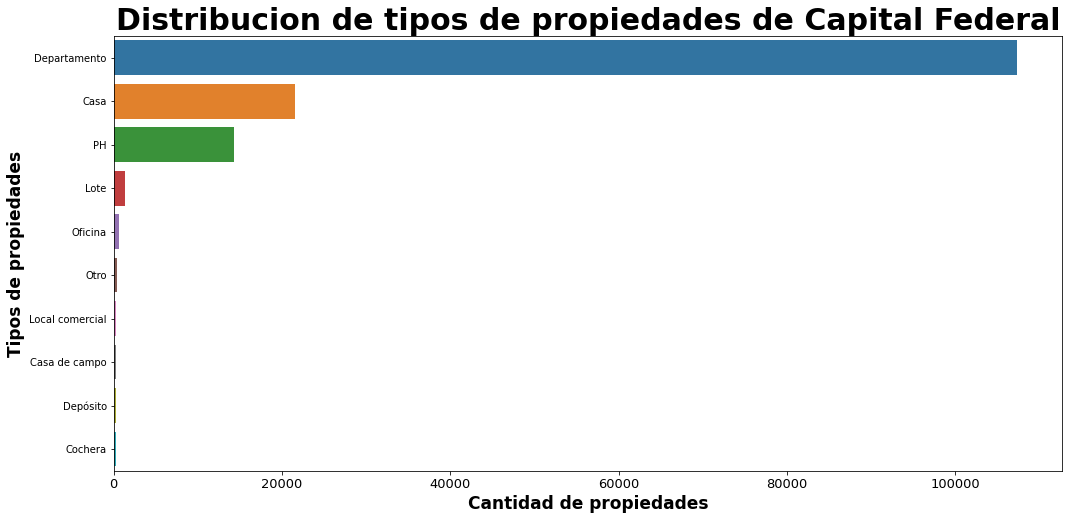

In [ ]:
plt.figure(figsize=(17,8))
raw.sort_values("property_type")
sns.countplot(y=raw.property_type, data=raw, order=raw.property_type.value_counts().index)
plt.title('Distribucion de tipos de propiedades de Capital Federal',size=30,fontweight ='bold')
plt.ylabel("Tipos de propiedades", size= 17, fontweight="bold")
plt.xlabel("Cantidad de propiedades",size= 17, fontweight="bold")
plt.xticks(size=13)

print(raw.property_type.value_counts())

## Graficos l2 y l3

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text major ticklabel objects>)

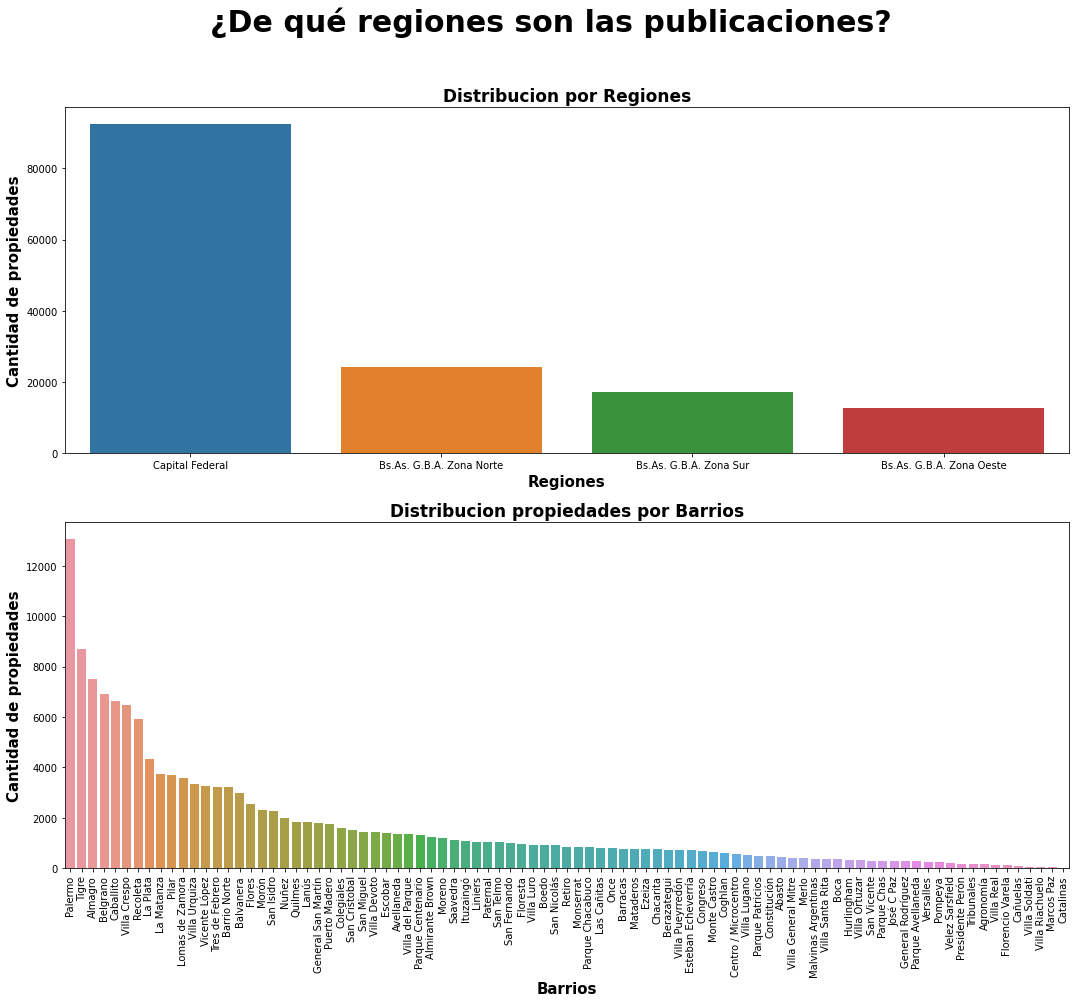

In [ ]:
l2 = raw.l2
l3 = raw.l3

print(l3.value_counts())

fig, axes = plt.subplots(2,1, figsize=(18,14))
fig.suptitle('¿De qué regiones son las publicaciones?', size= 30, fontweight="bold")

#Grafico Regiones
sns.countplot(ax=axes[0],x=l2, data=l2, order=l2.value_counts().index)
plt.yticks(rotation=0, size=20)

axes[0].set_title("Distribucion por Regiones",size=17,fontweight ='bold')
axes[0].set_xlabel("Regiones",size=15,fontweight="bold")
axes[0].set_ylabel("Cantidad de propiedades",size=15, fontweight="bold")

#Grafico Barrios
sns.countplot(ax=axes[1],x=l3, data=l3, order=l3.value_counts().index)
axes[1].set_title("Distribucion propiedades por Barrios",size=17,fontweight ='bold')
plt.xlabel("Barrios", size= 15, fontweight="bold")
plt.ylabel("Cantidad de propiedades", size= 15, fontweight="bold")
plt.xticks(rotation=90, size=10)
plt.yticks(rotation=0, size=10)

## Checkpoint(1)

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

Checkpoint: deberías tener un dataset con 91485 instacias, 19 columnas.

In [ ]:
clases_abundantes = ["Departamento","PH","Casa"]
region = ["Capital Federal"]
df1 = raw[raw.property_type.isin(clases_abundantes) & raw.l2.isin(region)]
df1.shape

(91485, 19)

* Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?

In [ ]:
df2 = df1[["rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]
df2.describe(percentiles=[0.05,0.1,.25,.5,.75,.8,.9,.95,.96,.97,.98,.99]) 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
5%,1.000000,1.000000,1.000000,34.000000,32.000000,7.877120e+04
10%,2.000000,1.000000,1.000000,39.000000,36.000000,9.000000e+04
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
80%,4.000000,3.000000,2.000000,128.000000,110.000000,3.190000e+05


 Si tenemos en cuenta la diferencia entre los percentiles y los maximos, vemos que hay valores que no 
 tienen coherencia o sentido y trendriamos que filtrar.
En los minimos de surface_total y surface_covered tambien hay valores que no tienen sentido, ya que
no suelen haber propiedades con tan poca superficie.

## Outliers

* Algunas instancias tienen valores de superficie (surface_total) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable. Lo mismo ocurre con valores de superficie total muy chico.

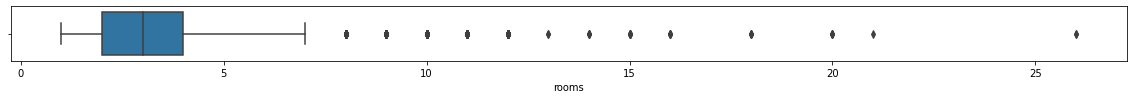

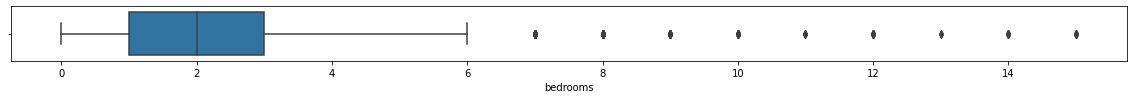

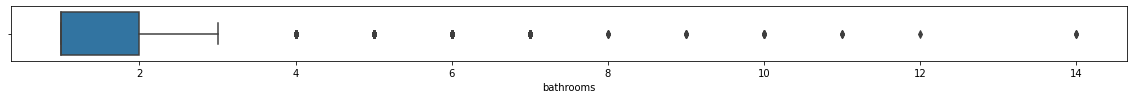

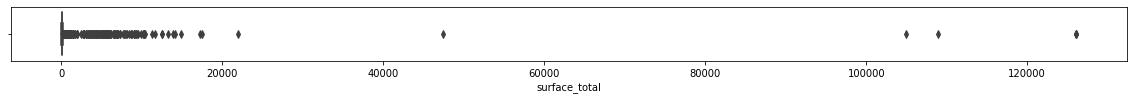

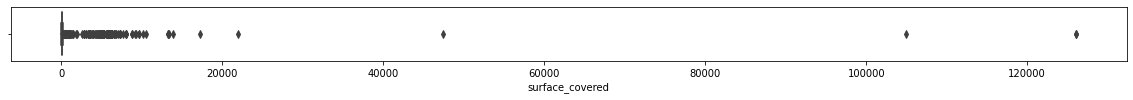

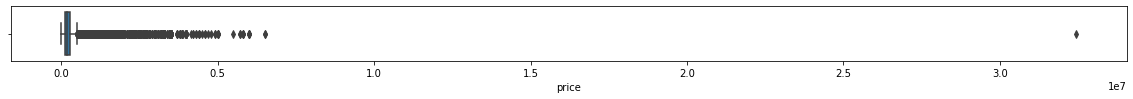

In [ ]:
#vemos los outliers de forma general de todas las variables
for i in df2:
    plt.figure(figsize=(20,1))
    sns.boxplot(data=df2, x=i)

## Filtros







Filtro general entre los cuantiles 0.1 y 0.9

In [ ]:
df2.shape

(91485, 6)

In [ ]:
for i in df2.columns:
    q1 = df2[i].quantile(.1)
    q9 = df2[i].quantile(.95)
    df2_f = df2[(df2[i] > q1) & (df2[i]<q9)] 

In [ ]:
df2_f

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


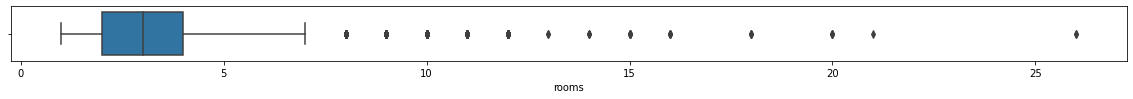

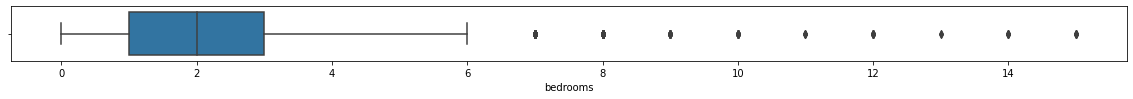

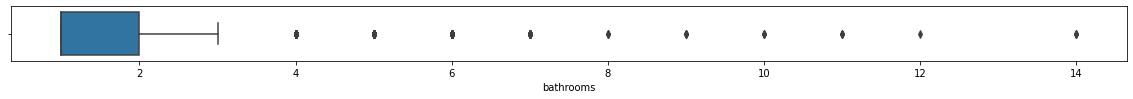

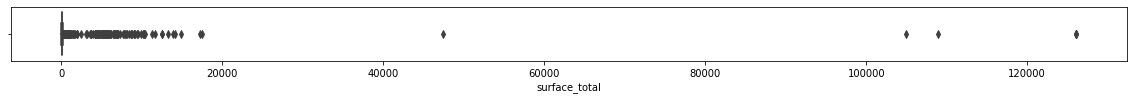

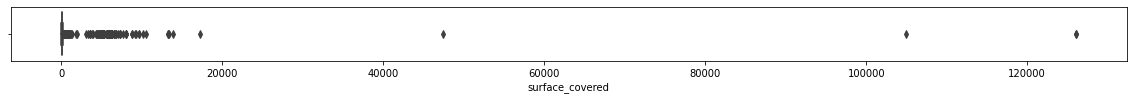

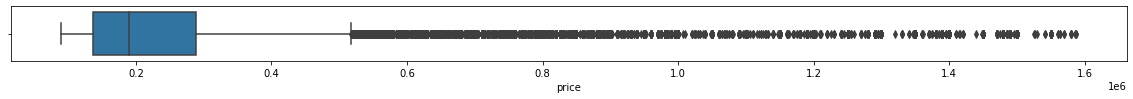

In [ ]:
for i in df2_f:
    plt.figure(figsize=(20,1))
    sns.boxplot(data=df2_f, x=i)

In [ ]:
df2_f.price.max()

1587000.0

Filtro por contexto, sentido comun, y busquedas por internet

In [ ]:
# Definimos una funcion para analizar los outliers utilizando botxplots y la distribucion de cada variable
# utilizando histogramas:

def graficador(data_g,x_g,bins):
    fig, axes = plt.subplots(3,1, figsize=(15,10))

    sns.boxplot(ax=axes[0], data=data_g, x=x_g, showfliers= False)
    sns.boxplot(ax=axes[1], data=data_g, x=x_g, showfliers= True)
    sns.histplot(ax=axes[2], data=data_g,x=x_g, bins=bins,kde=False)

Filtro rooms

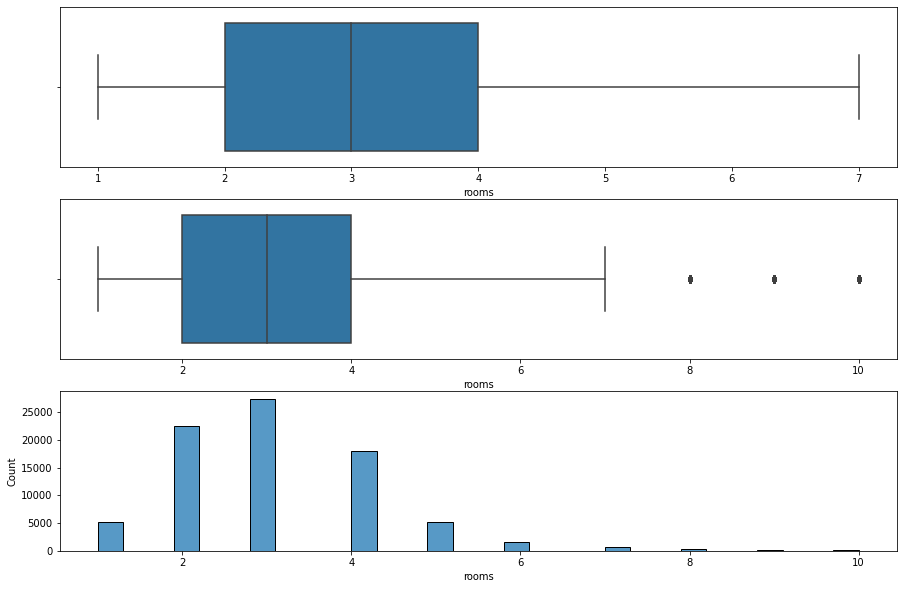

In [ ]:
#rooms

rooms_filtrado = df2_f[df2_f.rooms <= 10]
graficador(rooms_filtrado,rooms_filtrado.rooms,30)

# Por la frecuencia que se ve en el histograma, por los valores de los outliers y por sentido comun 
# 10 habitaciones parece un buen punto de corte.

Filtro bedrooms

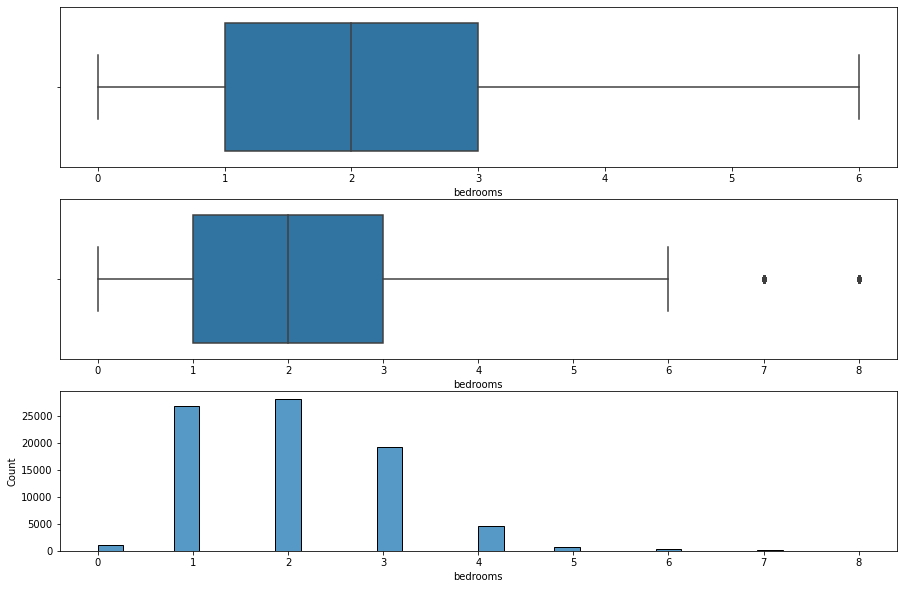

In [ ]:
#bedrooms

bed_filtrado = df2_f[df2_f.bedrooms <= 8]
graficador(bed_filtrado,bed_filtrado.bedrooms,30)

# Por la frecuencia que se ve en el histograma, por los valores de los outliers y por sentido comun  
# 8 dormitorios parece un buen punto de corte. 

Filtro bathrooms

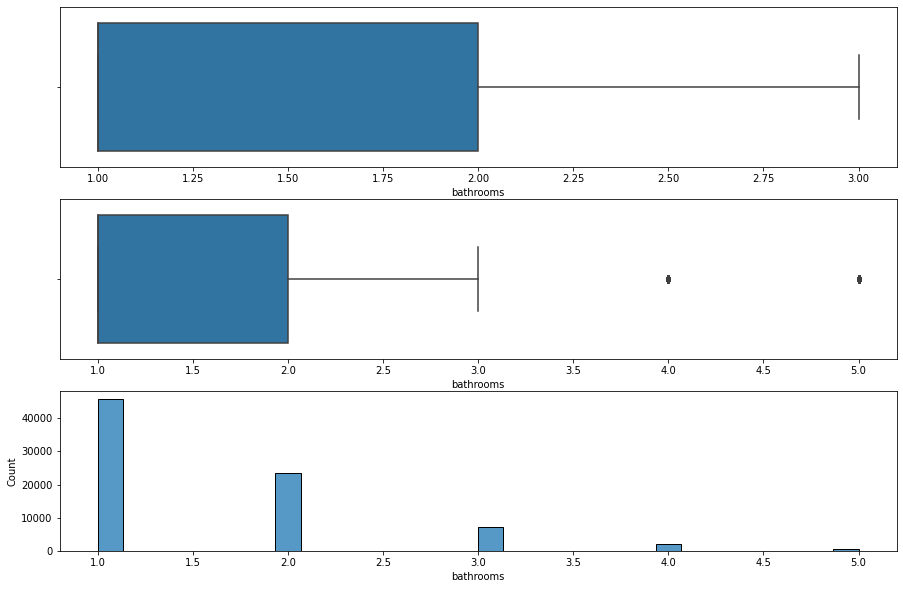

In [ ]:
#bathrooms

bath_filtrado = df2_f[df2_f.bathrooms <= 5]
graficador(bath_filtrado,bath_filtrado.bathrooms,30)

# Por la frecuencia que se ve en el histograma, por los valores de los outliers y por sentido comun  
# 6 baños parece un buen punto de corte.

Filtro surface_total

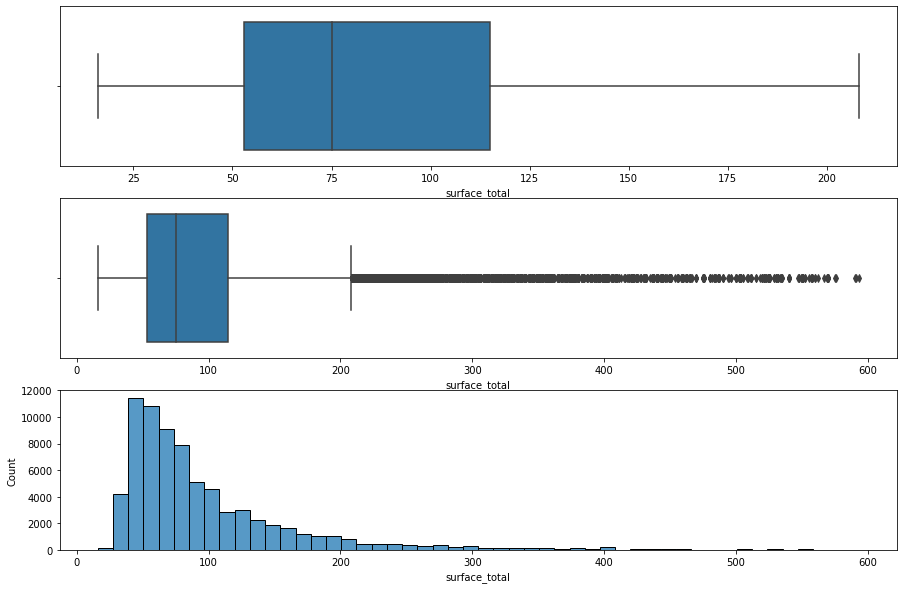

In [ ]:
#surface_total

st_filtrado = df2_f[(df2_f.surface_total <600) & (df2_f.surface_total > 15)]
graficador(st_filtrado,st_filtrado.surface_total,50)

# Propiedades con mas de 600 m2 no tiene sentido considerar, y tampoco menos de 15, en este caso 
# permitimos que el limite sea hasta 600 por la cantidad de outliers.

Filtro surface_covered

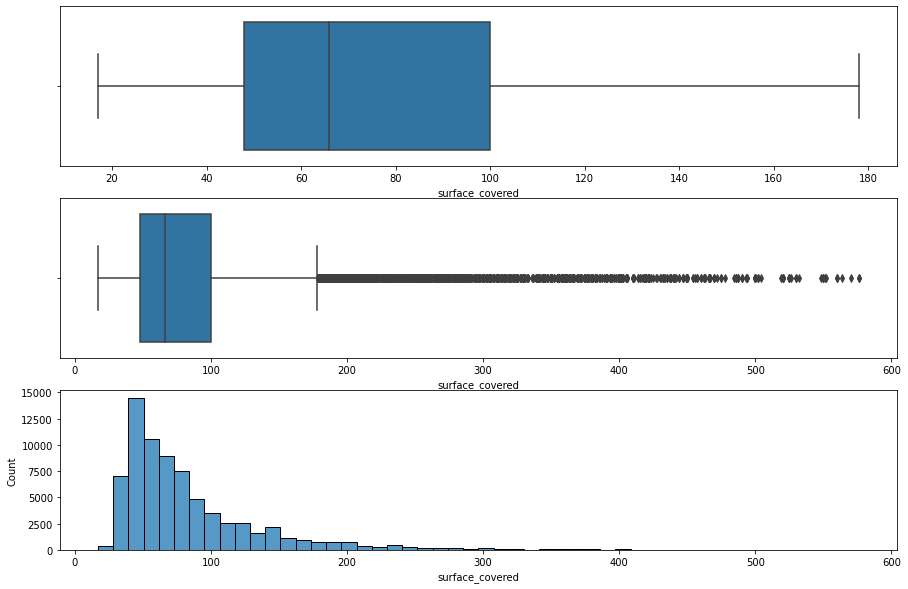

In [ ]:
#surface_covered

sc_filtrado = df2_f[(df2_f.surface_covered < 600) & (df2_f.surface_covered > 15) ]
graficador(sc_filtrado , sc_filtrado.surface_covered, 50)

# Propiedades con mas de 600 m2 no tiene sentido considerar, y tampoco menos de 15, en este caso 
# permitimos que el limite sea hasta 600 por la cantidad de outliers.

Filtro price

* El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

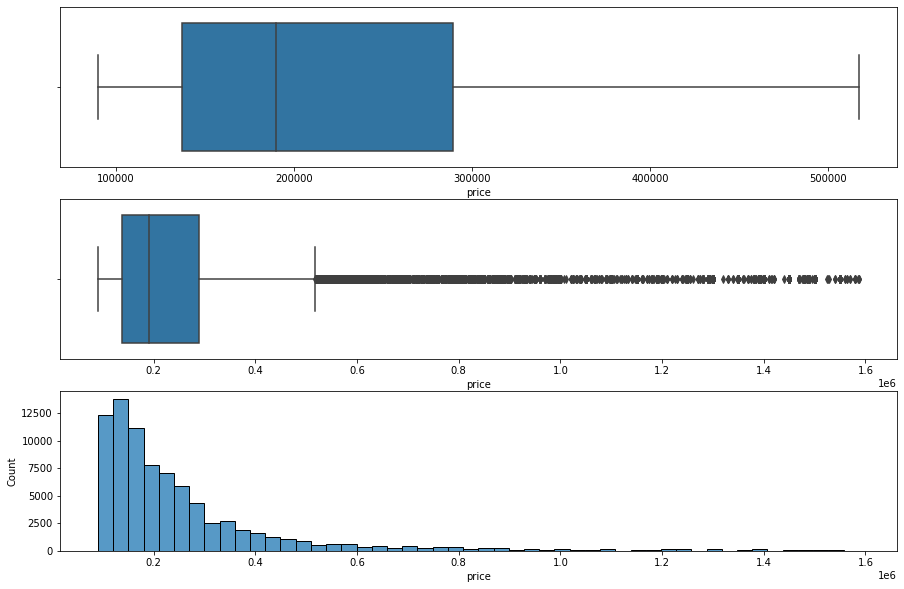

In [ ]:
#price

price_filtrado = df2_f[df2_f.price <= 1587000]
graficador(price_filtrado,price_filtrado.price,50)

# Si bien el Q3 del boxplot llega a los 520000 aproximadamente, en este caso vemos mucha cantidad de 
# outliers a diferentes valores, un buen punto de corte podria ser a los 1587000

* Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias.

In [ ]:
#total = 91485
cub_may_to = df2_f[df2_f.surface_covered <= df2_f.surface_total]

In [ ]:
# Podemos definir un primer dataframe filtrado df3:
#Filtros:
df3 = df2_f[
          (df2_f.rooms <= 10) & 
          (df2_f.bedrooms <= 8) & 
          (df2_f.bathrooms <= 5) & 
          (df2_f.surface_total <600) & (df2.surface_total > 15) &
          (df2_f.surface_covered < 600) & (df2.surface_covered > 15) &
          (df2_f.surface_covered <= df2_f.surface_total) &
          (df2_f.price <= 1587000)
        ]
df3.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


(71708, 6)

## Pairplots







* Una vez filtrado el dataset, puedes utilizar la función pairplot de Seaborn.

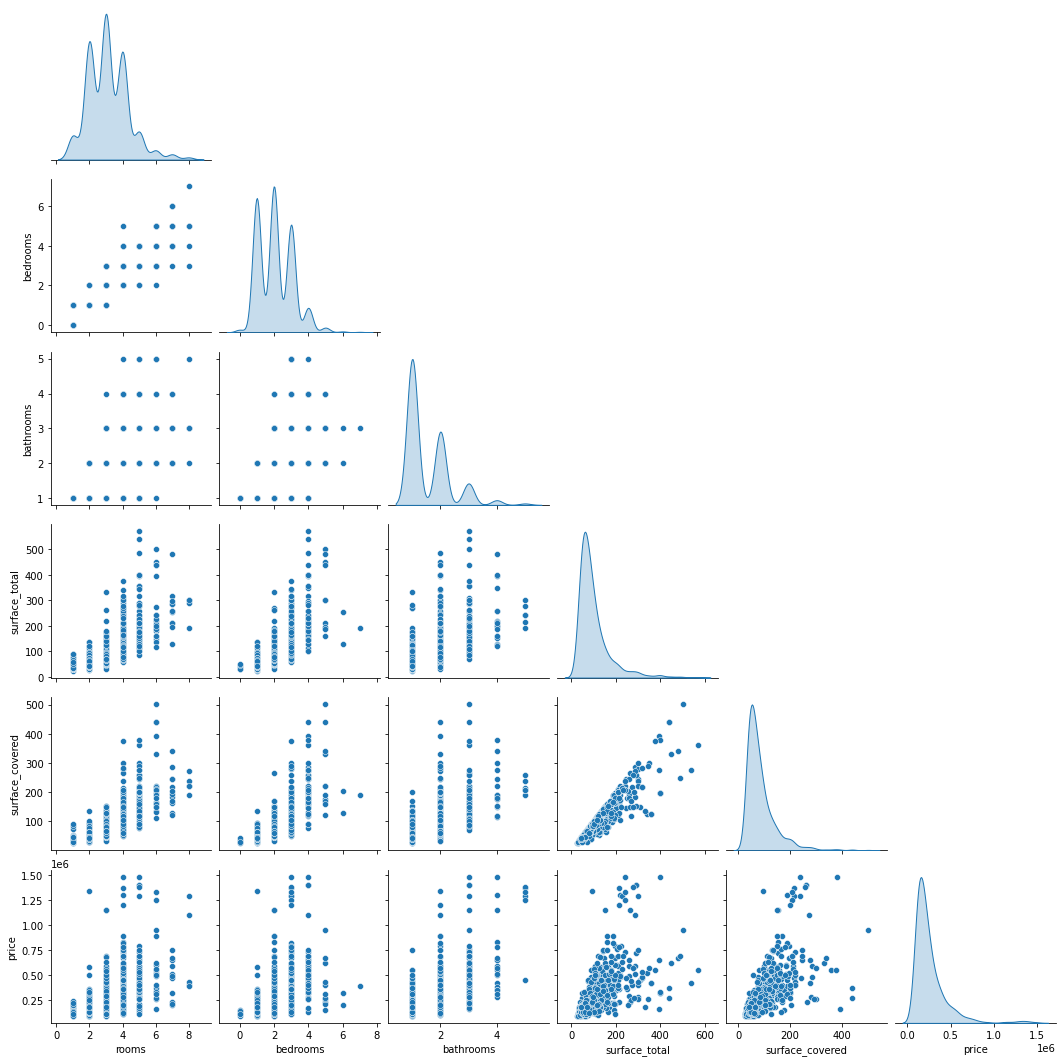

In [ ]:
sns.pairplot(df3.sample(1000), diag_kind='kde', corner=True)

## Analisis de variables




In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

La correlación es un tipo de asociación entre dos variables numéricas, específicamente evalúa la tendencia (creciente o decreciente) en los datos. Puede estar definida generalmente segun Pearson, Spearman o Kendall, en funcion de la distrubucion y el tipo de variables.

*   **Variables Cualitativas:** 
  - start_date 
  - end_date 
  - created_on
  - l1 
  - l2 
  - l3 
  - currency 
  - tittle
  - description
  - property_type 
  - operation_type
*   Variables Cuantitativas:

  *   Variables Discretas: 
      * rooms 
      * bedrooms 
      * bathrooms
  *   Variables Continuas: 
       * surface_total 
        * surface_covered 
        * price 
        * lat 
        * lon

## Distribuciones




* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

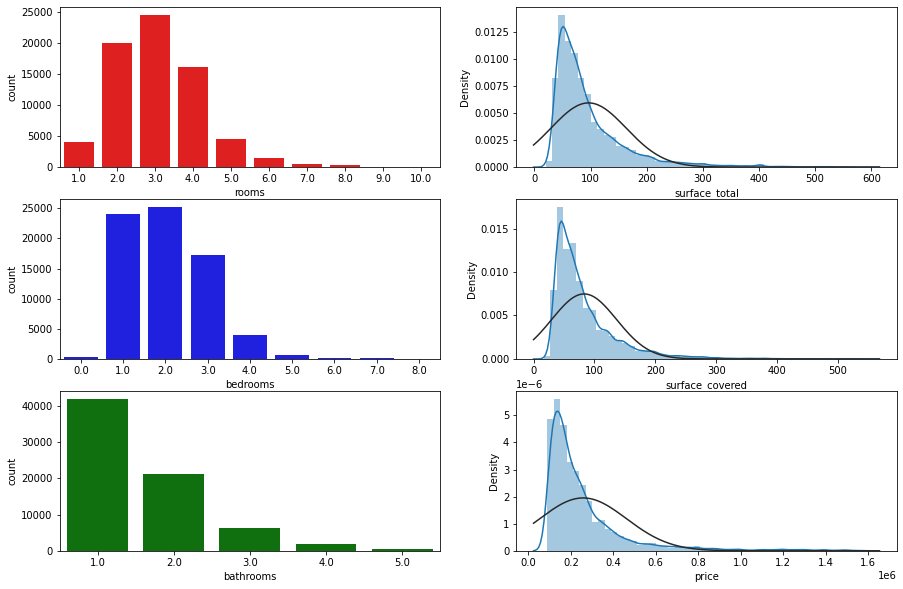

In [ ]:
from scipy.stats import norm
#distribuciones
fig, axes = plt.subplots(3,2, figsize=(15,10))

sns.countplot(ax=axes[0,0], x= df3.rooms, color= "r")
sns.countplot(ax=axes[1,0], x= df3.bedrooms, color= "b")
sns.countplot(ax=axes[2,0], x= df3.bathrooms, color= "g" )

sns.distplot(ax=axes[0,1], a=df3.surface_total,fit=norm, kde=True)
sns.distplot(ax=axes[1,1], a=df3.surface_covered,fit=norm, kde=True)
sns.distplot(ax=axes[2,1], a=df3.price,fit=norm, kde=True)

Vemos que las variables no siguen una distribucion normal ideal, sino que presentan en general una asimetria positiva o hacia la derecha (skewness), y una curtosis positiva (kurtosis). Asi que vamos a probar con Log Normal y Johnson SU, solo para la variable "price" que es la que mas nos interesa:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Normal')

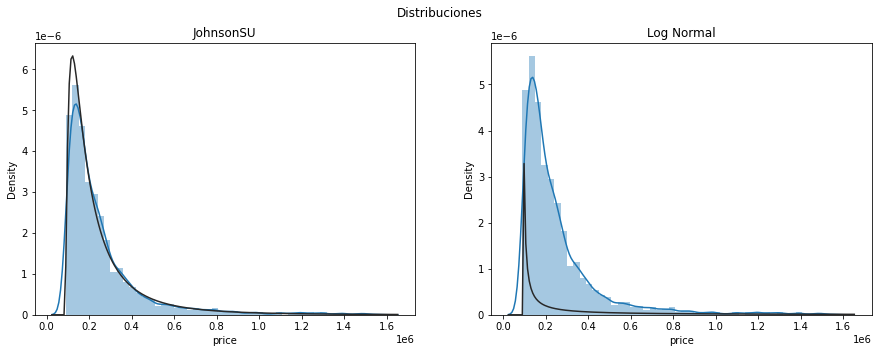

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Distribuciones')

sns.distplot(ax=axes[0], a=df3.price,fit=stats.johnsonsu, kde=True)
axes[0].set_title('JohnsonSU')

sns.distplot(ax=axes[1], a=df3.price,fit=stats.lognorm, kde=True)
axes[1].set_title('Log Normal')

La distribucion de Johnson's SU para ser la mas adecuada para "price". Por la forma de la curva parece que tambien para "surface_covered" y "surface_total".

## **Correlacion general**

¿Qué diferencias encuentras según cada tipo de propiedad?

In [ ]:
df3["property_type"] = df1.property_type 
df3.property_type.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Departamento    60995
PH               8875
Casa             1838
Name: property_type, dtype: int64

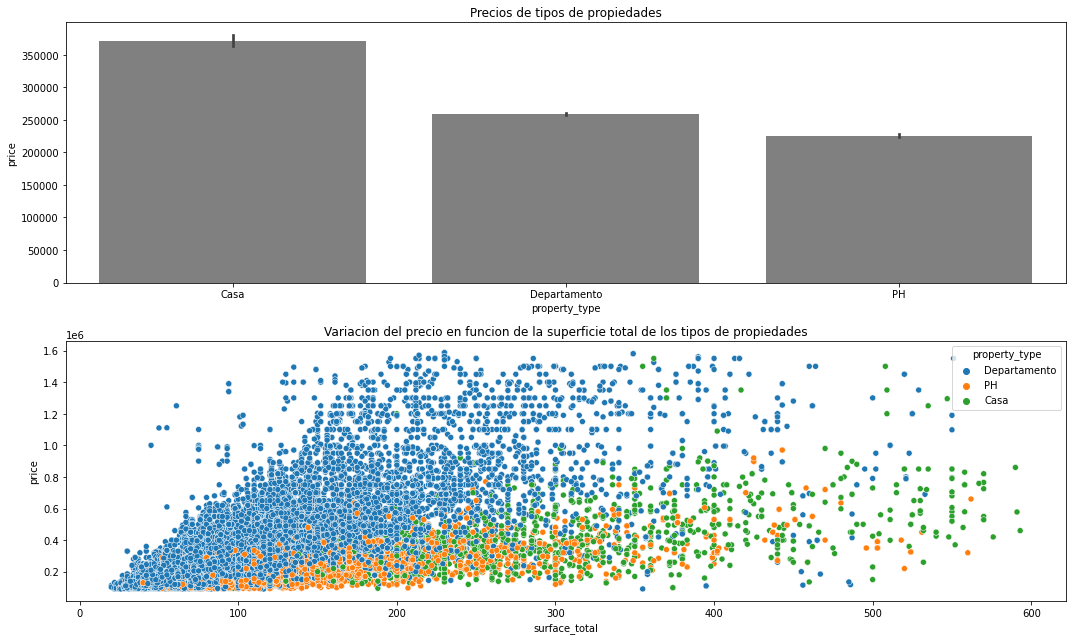

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,9))

sns.barplot(ax=axes[0], x=df3.property_type, y=df3.price, order=["Casa","Departamento","PH"], color="grey")
axes[0].set_title("Precios de tipos de propiedades")
sns.scatterplot(ax=axes[1], x=df3.surface_total, y=df3.price, hue=df3.property_type, ci="sd")
axes[1].set_title("Variacion del precio en funcion de la superficie total de los tipos de propiedades")
plt.tight_layout()

Por el grafico de barras podemos ver que las casas tienen los precios mas caros y la mayor desviacion estandar, seguidas de los departamentos y los PH. Luego por el scatterplot inferimos que la variacion del precio en funcion del area de la propiedad varia mas en el caso de los Departamentos que en el de las Casas y seguidas de los PHs. Esto puede deberse a que hay mucha mas cantidad de departamentos en el dataset, como tambien puede indicar que el precio de los departamentos puede ser afectado por otras variables como pueden ser el piso en el que este el departamento o el barrio.


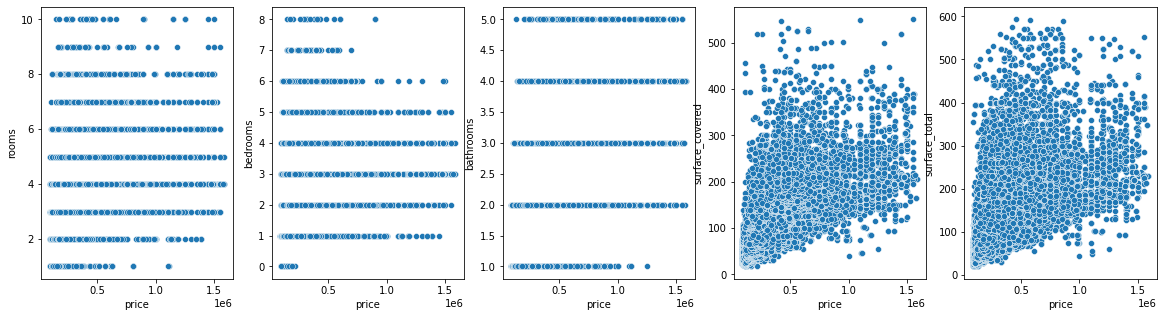

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(20,5))
sns.scatterplot(ax=axes[0], x=df3.price, y=df3.rooms)
sns.scatterplot(ax=axes[1], x=df3.price, y=df3.bedrooms)
sns.scatterplot(ax=axes[2], x=df3.price, y=df3.bathrooms)
sns.scatterplot(ax=axes[3], x=df3.price, y=df3.surface_covered)
sns.scatterplot(ax=axes[4], x=df3.price, y=df3.surface_total)

In [ ]:
# Cálculo de correlación de Pearson
corr_pearson = df3.corr(method="pearson")
corr_pearson

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.932677,0.576719,0.725852,0.768401,0.515014
bedrooms,0.932677,1.000000,0.576376,0.695253,0.734084,0.473760
bathrooms,0.576719,0.576376,1.000000,0.609614,0.662020,0.656352
surface_total,0.725852,0.695253,0.609614,1.000000,0.922489,0.673957
surface_covered,0.768401,0.734084,0.662020,0.922489,1.000000,0.743432
price,0.515014,0.473760,0.656352,0.673957,0.743432,1.000000


In [ ]:
# Cálculo de correlación de Spearman
corr_spear = df3.corr(method="spearman")
corr_spear

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.968720,0.594922,0.822016,0.857709,0.651594
bedrooms,0.968720,1.000000,0.587726,0.802999,0.840694,0.632759
bathrooms,0.594922,0.587726,1.000000,0.665497,0.685911,0.677651
surface_total,0.822016,0.802999,0.665497,1.000000,0.953474,0.805432
surface_covered,0.857709,0.840694,0.685911,0.953474,1.000000,0.811312
price,0.651594,0.632759,0.677651,0.805432,0.811312,1.000000


In [ ]:
# Cálculo de correlación de Kendall
corr_ken = df3.corr(method="kendall")
corr_ken

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.940965,0.529379,0.687260,0.728468,0.513161
bedrooms,0.940965,1.000000,0.532421,0.668615,0.708592,0.501252
bathrooms,0.529379,0.532421,1.000000,0.543994,0.562871,0.553004
surface_total,0.687260,0.668615,0.543994,1.000000,0.848357,0.614375
surface_covered,0.728468,0.708592,0.562871,0.848357,1.000000,0.620363
price,0.513161,0.501252,0.553004,0.614375,0.620363,1.000000


La correlacion de ***spearman*** es la que mejor se ajusta con las relaciones entre las variables, 
lo que nos puede dar un indicio de que no son necesariamente lineales y que probablemente 
hayan relaciones monotonicas, lo cual se concide con lo que se ve en los scatterplots.

Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. 

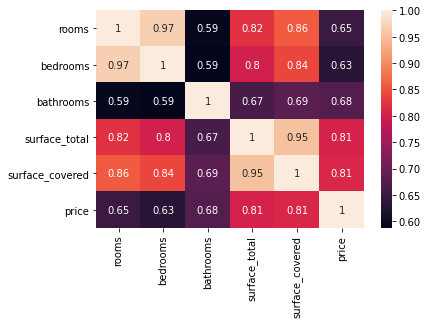

In [ ]:
sns.heatmap(data=corr_spear,annot=True))

* ¿Cuáles son las mejores variables para predecir el precio?

En relacion al precio podemos ver que "rooms", "bedrooms" y "bathrooms" tienen una correlacion de fuerza moderada (<=0.7).
Por otro lado "surface_total" y "surface_covered" tienen una correlacion fuerte (>0.7)
Es entonces que estas ultimas seran las mejores variables para predecir el precio.
Podemos observar ademas muy fuertes correlaciones entre "bedrooms" y "rooms", y tambien entre "surface_covered" y "surface_total".
Vemos tambien una correlacion enter rooms y bredrooms con las superficies lo cual es logico ya que la propiedad al tener mayor superficie puede tener mas habitaciones.

# 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.




¿Es mas caro el m2 de un PH o de una casa en Buenos Aires? ¿Cual es el precio promedio del metro cuadrado en Buenos Aires? Podemos evaluar el valor_m2 en cada barrio, o incluso en cada tipo de propiedad.
Esto podria estar sesgado por ejemplo por falta de actualizacion de valores de m2 en el caso de que se
hayan hecho remodelaciones en la casa y se haya agrandado o achicado la superficie, o que la publicacion sea muy vieja y el precio se haya actualizado.


In [ ]:
df1["valor_m2"]= df1["price"] / df1["surface_total"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print("Valor promedio del m2: $",df1.valor_m2.mean())

Valor promedio del m2: $ 2768.147308368326


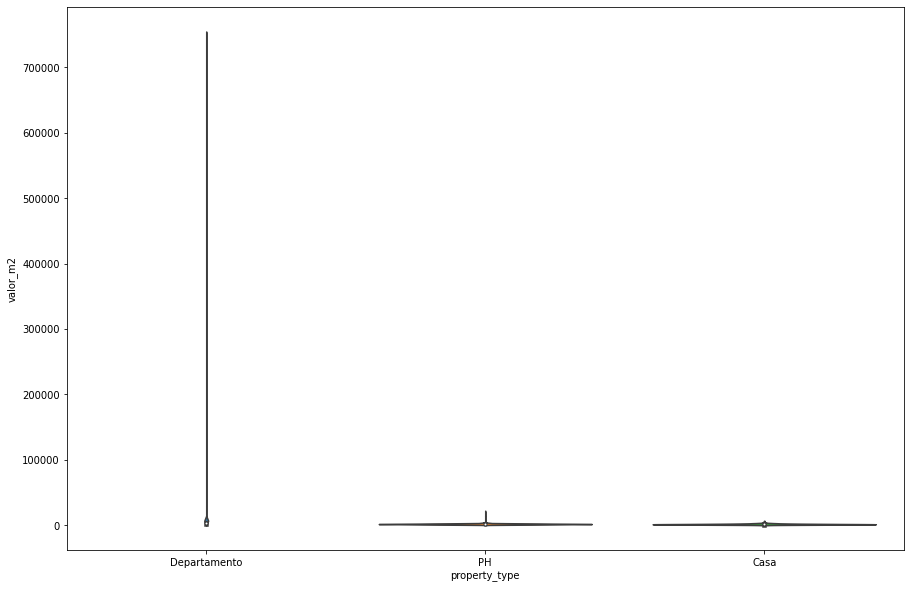

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x=df1.property_type, y=df1.valor_m2, order=["Departamento","PH","Casa"])

Gracias a este violinplot vemos que hay valores muy altos de valor_m2 para los departamentos.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text major ticklabel objects>)

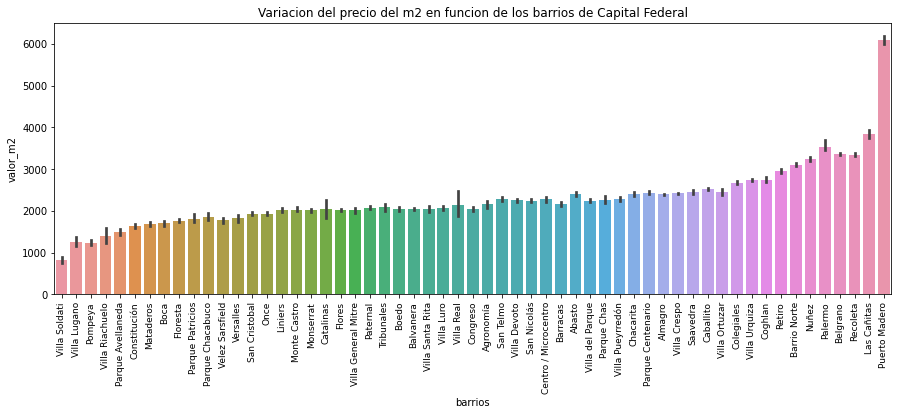

In [ ]:
# Podemos ver como varia este precio en los barrios de Capital Federal:
df1["barrios"] = raw.loc[:,"l3"]

df1.sort_values("valor_m2")

result = df1.groupby(["barrios"])['valor_m2'].aggregate(np.median).reset_index().sort_values('valor_m2')

plt.figure(figsize=(15,5))
sns.barplot(x=df1.barrios, y=df1.valor_m2, data=df1, order=result["barrios"])
plt.title("Variacion del precio del m2 en funcion de los barrios de Capital Federal")
plt.xticks(rotation=90, size=9)



Despues de este analisis vemos que hay una enorme variacion entre los barrios de los extremos por lo que seria mejor filtrar en el rango de 1000 a 4000 el valor_m2 para obtener un mejor valor promedio.

In [ ]:
df4 = df1[(df1.valor_m2 > 1000) & (df1.valor_m2 < 4000)]

(91485, 21)
(72969, 21)


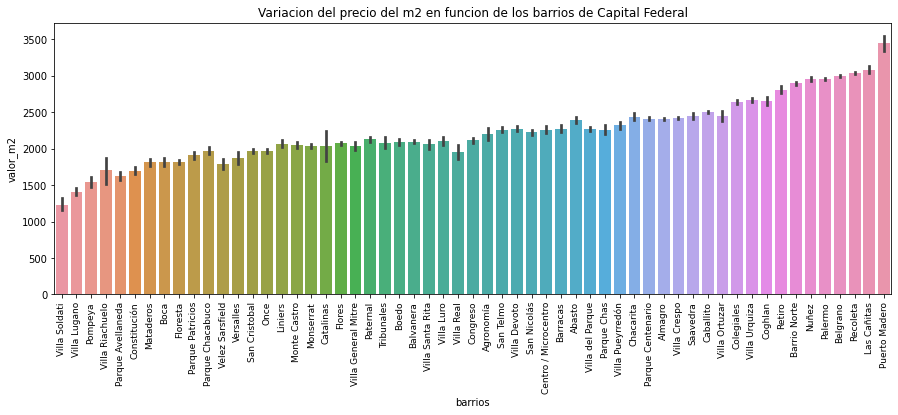

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df4.barrios, y=df4.valor_m2, data=df4, order=result["barrios"])
plt.title("Variacion del precio del m2 en funcion de los barrios de Capital Federal")
plt.xticks(rotation=90, size=9)
print(df1.shape)
print(df4.shape)

In [ ]:
print("Valor promedio del m2: $",df4.valor_m2.mean())

Valor promedio del m2: $ 2527.6367819200436


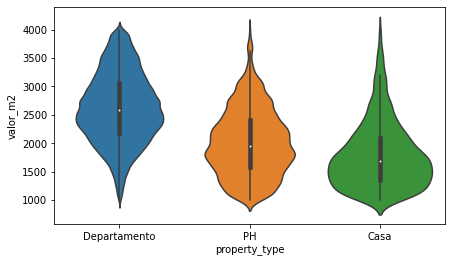

In [ ]:
plt.figure(figsize=(7,4))
sns.violinplot(x=df4.property_type, y=df4.valor_m2, order=["Departamento","PH","Casa"])

Si bien esta manipulacion no refleja el promedio real, 2527  es un valor promedio del m2 si uno no tiene en cuenta las propiedades filtradas de los barrios "Villa Soldati" y "Puerto Madero". Para usos generales puede ser mas util, tienendo esto en cuenta. A su vez vemos en los maximos de su frecuencia a los departamentos en 2500 aproximadamente, los PH en 1750 y las Casas en 1500.



# 3.1 Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

## Metricas de evaluacion

* Elegir una métrica apropiada para evaluar los resultados de los modelos.

Las metricas a utilizar para evaluar los modelos seran:
- RMSE: 

Formula: RMSE = (1/n Σ(Predicted - Actual)^2)^1/2

El RMSE es la raíz cuadrada del promedio de diferencias cuadradas entre la predicción y la observación real, por ende es un valor que uno busca minimizar lo maximo posible. La comparacion entre el RMSE del conjunto entrenado y el de testeo nos puede dar una idea del overfitting en el caso de que el conjunto entrenado disminuya en mucha mayor medida que el de testeo. No hay valores establecidos para considerar el error aceptable o no, simplemente se busca el menor valor de forma comparativa.


- R cuadrado (coeficiente de determinacion):

Formula: R^2 = 1 - SSE/SST
Puede entenderse como la version estandarizada del MSE(error cuadratico medio), que permite una mejor interpretacion de la performance del modelo. Toma valores entre 0 y 1, siendo que R^2 >= 0.75 es aproximadamente un valor que indica una buena prediccion del modelo. A diferencia del RMSE, el R^2 se busca maximizar.


- R cuadrado ajustado.

Formula: R^2ajt = 1 - ((1-R^2)*(N-1))/(N-p-1)

N = tamaño de muestra total

p = numero de predictores

Agregar más predictores a un modelo tiende a aumentar el valor de R^2. Esto se denomina sobreajuste y puede devolver un valor alto de R cuadrado injustificado. El R^2 ajustado mide la proporción de la variación explicada solo por aquellas variables independientes que realmente ayudan a explicar la variable dependiente, penalizando por agregar variables independientes que no ayudan a predecir la variable dependiente. Los valores aceptables y buscados son los mismos que para el R^2, y su mayor utilidad esta en la comparacion al manipular las variables. 






## Checkpoint(2)

In [ ]:
clases_abundantes = ["Departamento","PH","Casa"]

f1 = raw[(raw.l2 == "Capital Federal")]
f2 = f1[f1.property_type.isin(clases_abundantes)]
f3 = f2[(f2.surface_total <= 1000) & (f2.surface_total >= 15)]
f4 = f3[f3.price <= 4000000]
f5 = f4[["rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]
df_ml = f5.dropna()

print(f1.shape)
print(f2.shape)
print(f3.shape)
print(f4.shape)
print(f5.shape)
print(df_ml.shape)

(92539, 19)
(91485, 19)
(82405, 19)
(82373, 19)
(82373, 6)
(81019, 6)


In [ ]:
df_ml

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


## Importacion de librerias

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

* Seleccionar las variables predictoras (X) y la variable a predecir (y).

In [ ]:
# Seleccionamos las variables X e y
X = df_ml.drop("price",axis=1)
y = df_ml.price

* Realizar un Train/Test split de los datos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

## Funciones para evaluar modelos

* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.

In [ ]:
#Definimos una funcion que logra evaluar el desempeño de los modelos.

def model_ev(X_train, X_test, y_train, y_test, model):

  global rmse_train, rmse_test, r_squared_tra, adjusted_r_squared_tra, r_squared_te, adjusted_r_squared_te, y_test_pred,y_train_pred
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train) 
  y_test_pred = model.predict(X_test)

  
  # Calculo de RMSE 
  rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
  print(f'RMSE Train: {rmse_train}\n')
  print(f'RMSE Test: {rmse_test}\n')

  # Calculo de R cuadrado y R cuadrado ajustado del conjunto TRAIN
  SS_Residual_a = sum((y_train - y_train_pred)**2)       
  SS_Total_a = sum((y_train-np.mean(y_train))**2)     
  r_squared_tra = 1 - (float(SS_Residual_a))/SS_Total_a
  adjusted_r_squared_tra = 1 - (1-r_squared_tra)*(len(y)-1)/(len(y)-X.shape[1]-1)
  print(f"R^2(train)= {r_squared_tra}")
  print(f"R^2_ajt(train)= {adjusted_r_squared_tra}\n")
  
  # Calculo de R cuadrado y R cuadrado ajustado del conjunto TEST
  SS_Residual_b = sum((y_test - y_test_pred)**2)       
  SS_Total_b = sum((y_test-np.mean(y_test))**2)     
  r_squared_te = 1 - (float(SS_Residual_b))/SS_Total_b
  adjusted_r_squared_te = 1 - (1-r_squared_te)*(len(y)-1)/(len(y)-X.shape[1]-1)
  print(f"R^2(test)= {r_squared_te}") 
  print(f"R^2_ajt(test)= {adjusted_r_squared_te}\n")
  
  #Histograma de los errores (y - y_predicho) para cada conjunto:
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)
  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
  sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
  plt.xlabel('errores')
  plt.legend()

  #Scatter de y vs y-predicho para lo testeado:
  ax = plt.subplot(1,2,2)
  ax.scatter(y_test,y_test_pred, s =2)
      
  lims = [
      np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
      np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
      ]
      
  ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
  plt.xlabel('y (test)')
  plt.ylabel('y_pred (test)')
  plt.tight_layout()
  plt.show()

In [ ]:
#Definimos una funcion que devuelva un dataframe con los datos obtenidos de la evaluacion de los modelos.
def resultados(exp,var,model, hp):  
  dataf = pd.DataFrame({
                       "Exp": exp,
                       "Variables":var,
                       "Modelo": model, 
                       "HP": hp,
                       "rmse_train": [rmse_train],
                       "rmse_test": [rmse_test],
                       "R2 (train)": [r_squared_tra],
                       "R2 ajustado (train)": [adjusted_r_squared_tra],
                       "R2 (test)":  [r_squared_te],
                       "R2 ajustado (test)": [adjusted_r_squared_te]
                      })
  return dataf

## Experimentacion 1

### Seleccion de variables

 - Variable dependiente = "price"
 - Variables independientes = "rooms","bedrooms","bathrooms","surface_total" y "surface_covered"


### Benchmark

* Generar un modelo benchmark y evaluarlo.

#### LR

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.coef_, lr.intercept_)

[ 1.12100018e+04 -6.21331053e+04  1.31900797e+05  2.09227560e+03
  9.10536448e+01] -58000.994911365386


RMSE Train: 199993.77294372674

RMSE Test: 200410.4912548592

R^2(train)= 0.5512574373540616
R^2_ajt(train)= 0.5512297416408647

R^2(test)= 0.5533477928771956
R^2_ajt(test)= 0.5533202261775843



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


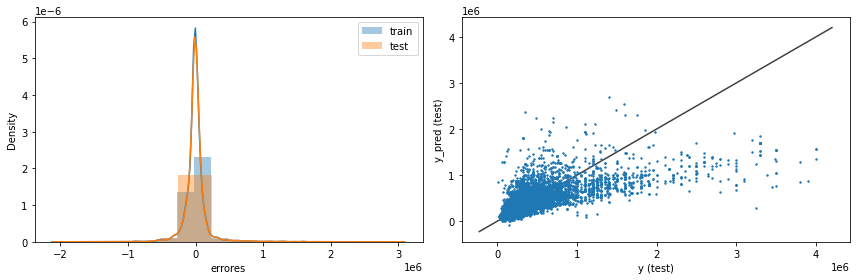

In [ ]:
model_ev(X_train,X_test,y_train,y_test, lr)

In [ ]:
df1_lr = resultados(1,5,"LR","-")
df1_lr

,Exp,Variables,Modelo,HP,rmse_train,rmse_test,R2 (train),R2 ajustado (train),R2 (test),R2 ajustado (test)
0,1,5,LR,-,199993.772944,200410.491255,0.551257,0.55123,0.553348,0.55332


### Modelos Complejos

- Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.


#### KNR

In [ ]:
knr = KNeighborsRegressor(n_neighbors=5)

RMSE Train: 122715.08250125757

RMSE Test: 148951.0879684405

R^2(train)= 0.8310492188888796
R^2_ajt(train)= 0.8310387915018485

R^2(test)= 0.753273420084206
R^2_ajt(test)= 0.7532581924923432



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


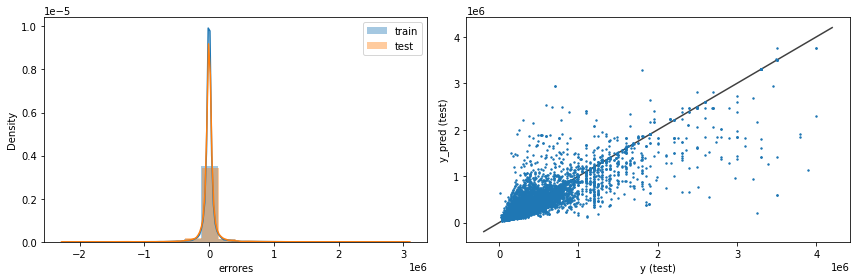

In [ ]:
model_ev(X_train,X_test,y_train,y_test,knr)

In [ ]:
df1_knr = resultados(1,5,"KNN","n_neighbors= 5")
df1_knr

,Exp,Variables,Modelo,HP,rmse_train,rmse_test,R2 (train),R2 ajustado (train),R2 (test),R2 ajustado (test)
0,1,5,KNN,n_neighbors= 5,122715.082501,148951.087968,0.831049,0.831039,0.753273,0.753258


#### DTR

In [ ]:
dtr = DecisionTreeRegressor(max_depth=3)

RMSE Train: 191802.94549833055

RMSE Test: 191826.0411481317

R^2(train)= 0.5872616143156666
R^2_ajt(train)= 0.5872361407258918

R^2(test)= 0.5907923847072358
R^2_ajt(test)= 0.5907671290312768



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


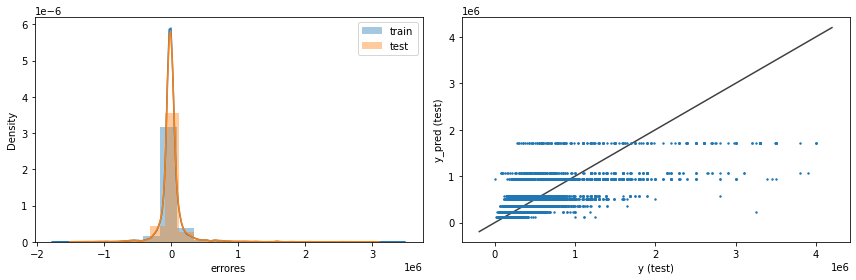

In [ ]:
model_ev(X_train, X_test,y_train, y_test, dtr)

In [ ]:
df1_dtr = resultados(1,5,"DTR","max_depth = 3")
df1_dtr

,Exp,Variables,Modelo,HP,rmse_train,rmse_test,R2 (train),R2 ajustado (train),R2 (test),R2 ajustado (test)
0,1,5,DTR,max_depth = 3,191802.945498,191826.041148,0.587262,0.587236,0.590792,0.590767


### Resultados iniciales Exp 1

In [ ]:
resultados_exp1 = pd.concat([df1_lr,df1_knr,df1_dtr])
resultados_exp1.reset_index(drop=True)

,Exp,Variables,Modelo,HP,rmse_train,rmse_test,R2 (train),R2 ajustado (train),R2 (test),R2 ajustado (test)
0,1,5,LR,-,199993.772944,200410.491255,0.551257,0.551230,0.553348,0.553320
1,1,5,KNN,n_neighbors= 5,122715.082501,148951.087968,0.831049,0.831039,0.753273,0.753258
2,1,5,DTR,max_depth = 3,191802.945498,191826.041148,0.587262,0.587236,0.590792,0.590767


### Ajuste de hiperparametros

* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.

#### KNR Analisis de hiperparametros

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

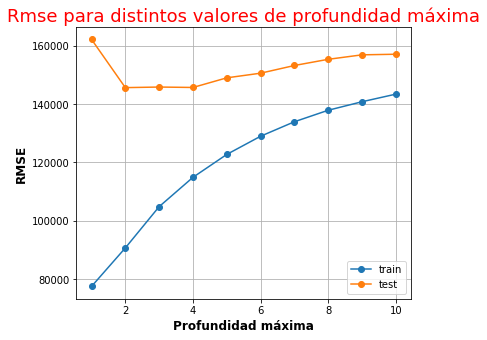

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
n_neighbors = [1,2,3,4,5,6,7,8,9,10]

for i in n_neighbors:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(n_neighbors, lista_rmse_train,'o-',label='train' )
plt.plot(n_neighbors, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

n_neighbors = 3 parece ser el valor con menor error

#### DTR Analsis de hiperparametros

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

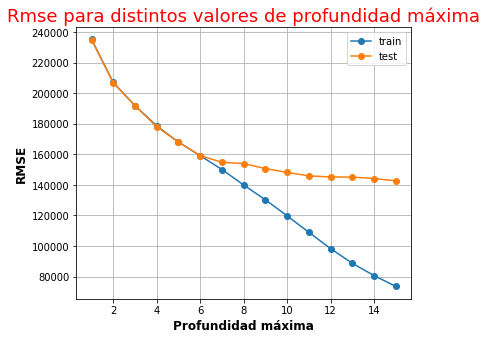

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

### Modelos

In [ ]:
knr = KNeighborsRegressor(n_neighbors=3) 
dtr = DecisionTreeRegressor(max_depth=8)


K-nearest Neighbors

RMSE Train: 104817.55539679411

RMSE Test: 145793.374783769

R^2(train)= 0.8767371031773857
R^2_ajt(train)= 0.8767294955775671

R^2(test)= 0.76362357653576
R^2_ajt(test)= 0.7636089877399208



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


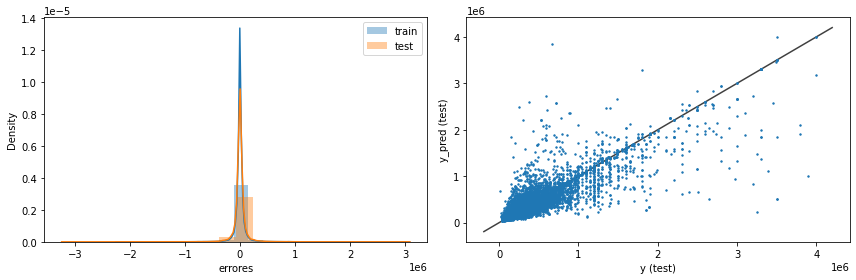

In [ ]:
print("\nK-nearest Neighbors\n")
model_ev(X_train,X_test,y_train,y_test, knr)
df1_knr2 = resultados(1,5,"KNR","n_neighbors = 3")


Decision Tree Regressor

RMSE Train: 139928.4264407992

RMSE Test: 154396.0768653708

R^2(train)= 0.7803272346161703
R^2_ajt(train)= 0.780313676744879

R^2(test)= 0.7349052658274913
R^2_ajt(test)= 0.7348889045808906



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


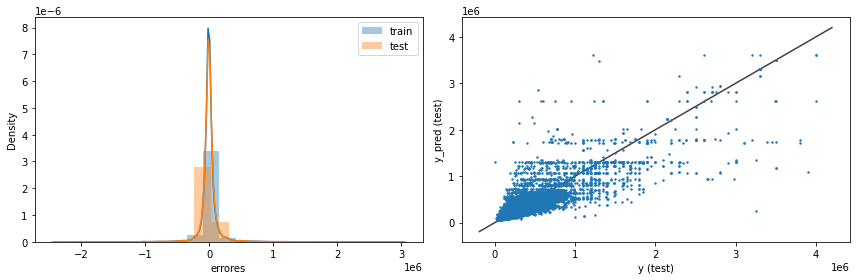

In [ ]:
print("\nDecision Tree Regressor\n")
model_ev(X_train,X_test,y_train,y_test, dtr)
df1_dtr2 = resultados(1,5,"DTR","max_depth=8")

### Resultados finales Exp 1

In [ ]:
resultados_exp1f = pd.concat([resultados_exp1, df1_knr2, df1_dtr2])
resultados_exp1f.reset_index(drop=True)

,Exp,Variables,Modelo,HP,rmse_train,rmse_test,R2 (train),R2 ajustado (train),R2 (test),R2 ajustado (test)
0,1,5,LR,-,199993.772944,200410.491255,0.551257,0.551230,0.553348,0.553320
1,1,5,KNN,n_neighbors= 5,122715.082501,148951.087968,0.831049,0.831039,0.753273,0.753258
2,1,5,DTR,max_depth = 3,191802.945498,191826.041148,0.587262,0.587236,0.590792,0.590767
3,1,5,KNR,n_neighbors = 3,104817.555397,145793.374784,0.876737,0.876729,0.763624,0.763609
4,1,5,DTR,max_depth=8,139928.426441,154396.076865,0.780327,0.780314,0.734905,0.734889


### Conclusion

* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?

Si bien el modelo KNR tiene un leve superioridad en el R^2 entrenado, presenta una gran diferencia de los valores de RMSE Y R^2 entre los conjuntos train y test, lo que podria estar indicando overfitting. Entonces por tener un menor RMSE, un mejor R^2 del conjunto test, y valores mas similares entre los conjuntos train y test, el mejor modelo para esta experimentacion sera el de DTR con max_depth = 8.

Propuesta de mejora: Incluir las variables de "lat" y "lon" para tener en cuenta la ubicacion de las propiedades.

## Experimentacion 2

* Ser crítico/a con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

### Seleccion de variables

En el EDA vimos que el precio de las propiedades variaba mucho en funcion de los barrios de Capital Federal. Como los barrios son variables categoricas no podemos usarlos en estos modelos, pero si podemos incluir "lat" y "lon", que son variables continuas y nos daran una referencia para la ubicacion.

In [ ]:
raw.dropna()
df_ml["lat"] = raw.lat
df_ml["lon"] = raw.lon

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_ml.dropna(how='any', inplace=True)
df_ml.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
lat                0
lon                0
dtype: int64

 - Variable dependiente = "price"
 - Variables independientes = "rooms","bedrooms","bathrooms","surface_total" y "surface_covered","lat","lon".

In [ ]:
X = df_ml.drop("price", axis=1)
y = df_ml.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Benchmark

####LR

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


RMSE Train: 187479.27625557448

RMSE Test: 178568.8426656468

R^2(train)= 0.5808681365601307
R^2_ajt(train)= 0.5808299160236212

R^2(test)= 0.5900998903841904
R^2_ajt(test)= 0.590062511689151



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


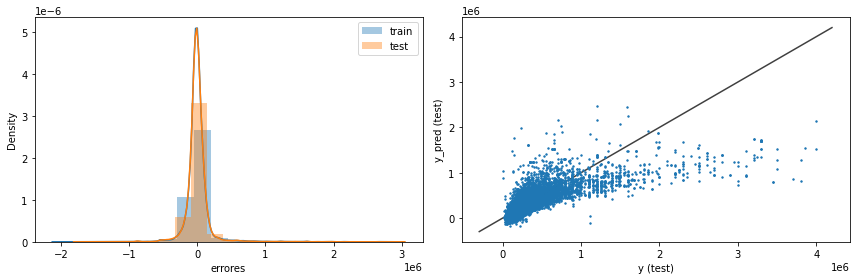

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
model_ev(X_train,X_test,y_train,y_test, lr)

In [ ]:
df2_lr = resultados(2,7,"LR","-")
df2_lr

,Exp,Variables,Modelo,HP,rmse_train,rmse_test,R2 (train),R2 ajustado (train),R2 (test),R2 ajustado (test)
0,2,7,LR,-,187479.276256,178568.842666,0.580868,0.58083,0.5901,0.590063


### Modelos Complejos

#### KNR


K-nearest Neighbors

RMSE Train: 94074.99324103778

RMSE Test: 132671.26456873622

R^2(train)= 0.8944659674586599
R^2_ajt(train)= 0.8944563438349377

R^2(test)= 0.7737334244622972
R^2_ajt(test)= 0.7737127912662423



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


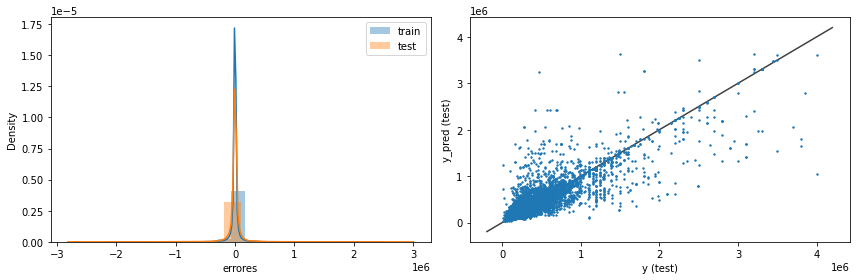

In [ ]:
print("\nK-nearest Neighbors\n")
model_ev(X_train, X_test, y_train, y_test, knr)
df2_knr = resultados(2,7,"KNR","n_neighbors = 3")

#### DTR


Decision Tree Regressor

RMSE Train: 99988.98497544952

RMSE Test: 108093.86779768727

R^2(train)= 0.8807801801983765
R^2_ajt(train)= 0.8807693085709177

R^2(test)= 0.8498003984359341
R^2_ajt(test)= 0.8497867017694288



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


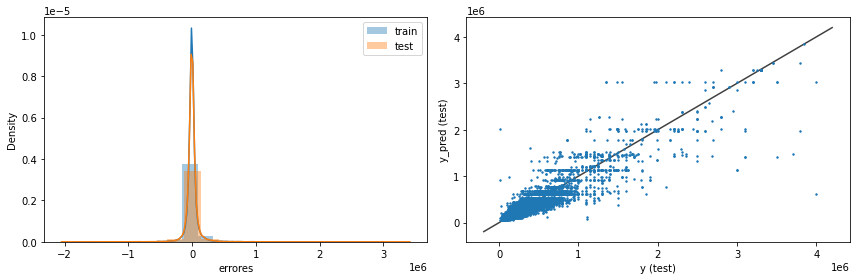

In [ ]:
print("\nDecision Tree Regressor\n")
model_ev(X_train, X_test, y_train, y_test, dtr)
df2_dtr = resultados(2,7,"DTR","n_neighbors = 8")

### Resultados iniciales Exp 2

In [ ]:
res_exp2 = pd.concat([df2_lr, df2_knr, df2_dtr])
res_exp2.reset_index(drop=True)

,Exp,Variables,Modelo,HP,rmse_train,rmse_test,R2 (train),R2 ajustado (train),R2 (test),R2 ajustado (test)
0,2,7,LR,-,187479.276256,178568.842666,0.580868,0.580830,0.590100,0.590063
1,2,7,KNR,n_neighbors = 3,94074.993241,132671.264569,0.894466,0.894456,0.773733,0.773713
2,2,7,DTR,n_neighbors = 8,99988.984975,108093.867798,0.880780,0.880769,0.849800,0.849787


### Ajuste de hiperparametros

* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.

#### KNR Analisis de hiperparametros

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

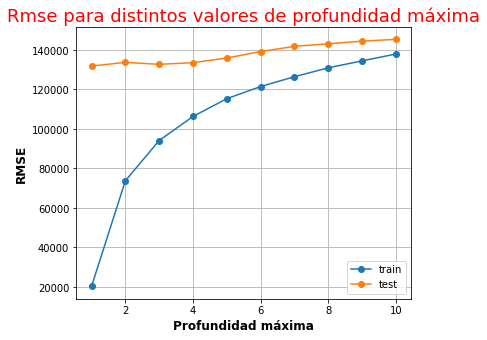

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
n_neighbors = [1,2,3,4,5,6,7,8,9,10]

for i in n_neighbors:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(n_neighbors, lista_rmse_train,'o-',label='train' )
plt.plot(n_neighbors, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

n_neighbors = 3 parece ser el valor con menor error

#### DTR Analsis de hiperparametros

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

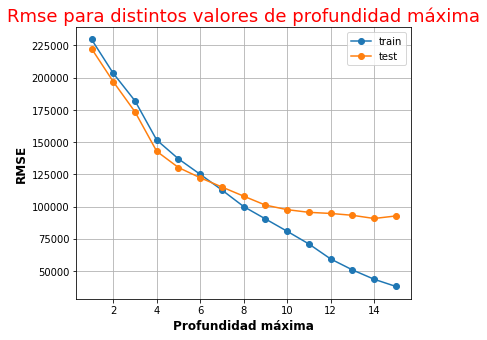

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

max_depth = 9 parece ser el mejor valor que evita el sobreajuste.

### Modelos

#### DTR

In [ ]:
dtr = DecisionTreeRegressor(max_depth=9)


Decision Tree Regressor

RMSE Train: 90406.9991596731

RMSE Test: 101017.29222276651

R^2(train)= 0.9025350981246946
R^2_ajt(train)= 0.9025262103231089

R^2(test)= 0.8688228736548423
R^2_ajt(test)= 0.8688109116433991



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


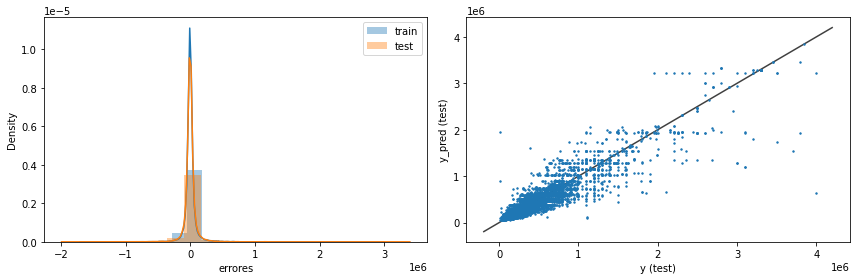

In [ ]:
print("\nDecision Tree Regressor\n")
model_ev(X_train, X_test, y_train, y_test, dtr)
df2_dtr2 = resultados(2,7,"DTR","max_depth = 9")

### Resultados finales Exp 2

In [ ]:
res_exp2f = pd.concat([df2_lr, df2_knr, df2_dtr2])
res_exp2f.reset_index(drop=True)

,Exp,Variables,Modelo,HP,rmse_train,rmse_test,R2 (train),R2 ajustado (train),R2 (test),R2 ajustado (test)
0,2,7,LR,-,187479.276256,178568.842666,0.580868,0.580830,0.590100,0.590063
1,2,7,KNR,n_neighbors = 3,94074.993241,132671.264569,0.894466,0.894456,0.773733,0.773713
2,2,7,DTR,max_depth = 9,90406.999160,101017.292223,0.902535,0.902526,0.868823,0.868811


### Conclusion

* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?

El mejor modelo para esta experimentacion con estas variables es el de DTR con max_depth = 9, debido a que tiene el R^2 mas alto, y el menor RMSE, siendo sus valores lo suficientemente proximos entre los conjuntos train y test como para considerar que no hay overfitting.

Propuesta de mejora: Ver la importancia de las variables y utilizar solo las mas importantes.

## Importancia de las variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


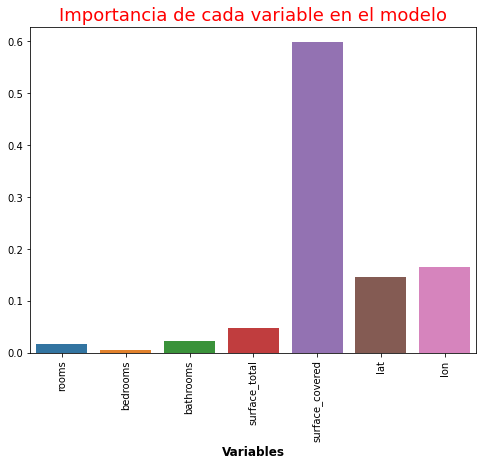

In [ ]:
imp_variables = dtr.feature_importances_

plt.figure(figsize = (8, 6))
sns.barplot(X.columns, imp_variables)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

## Experimentacion 3

### Seleccion de variables

Vamos a probar dejando solo "surface_covered", "lat", y "lon". Se podria suponer que mucha de la influencia de las otras variables sobre el precio esta bastante cubierta por "surface_covered", no asi para "lat" y "lon".

In [ ]:
df1_ml = df_ml[["lat","lon","surface_covered","price"]]

In [ ]:
df2_ml = df1_ml.copy()
df2_ml["coord_ll"] = df1_ml.lat * df1_ml.lon
df2_ml.drop(["lat","lon"], axis=1)

,surface_covered,price,coord_ll
0,140.0,153000.0,2020.462531
1,58.0,159000.0,2022.464151
2,45.0,125000.0,2021.214853
3,50.0,295000.0,2020.818580
5,56.0,150000.0,2021.703306
...,...,...,...
146553,100.0,620000.0,2020.628596
146554,111.0,570000.0,2020.725238
146555,134.0,480000.0,2020.725238
146556,143.0,530000.0,2020.971924


In [ ]:
X = df2_ml.drop("price",axis=1)
y = df2_ml.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Benchmark

####LR

RMSE Train: 261590.2062482915

RMSE Test: 256101.8234708756

R^2(train)= 0.18400574300046757
R^2_ajt(train)= 0.18396322447627722

R^2(test)= 0.1568749203201727
R^2_ajt(test)= 0.1568309881064489



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


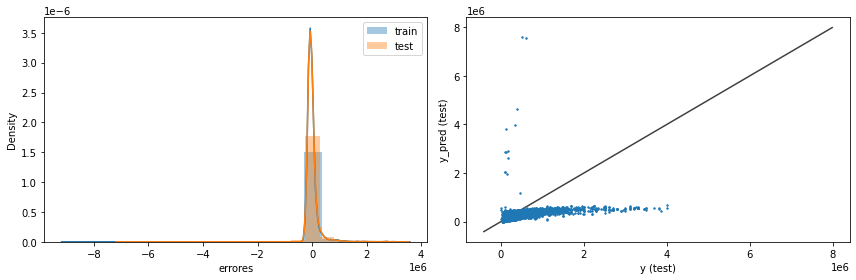

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
model_ev(X_train,X_test,y_train,y_test, lr)

In [ ]:
df3_lr = resultados(3,3,"LR","-")
df3_lr

,Exp,Variables,Modelo,HP,rmse_train,rmse_test,R2 (train),R2 ajustado (train),R2 (test),R2 ajustado (test)
0,3,3,LR,-,261590.206248,256101.823471,0.184006,0.183963,0.156875,0.156831


### Modelos Complejos

#### KNN


K-nearest Neighbors

RMSE Train: 81789.58008615221

RMSE Test: 114799.45984706943

R^2(train)= 0.9202299069555375
R^2_ajt(train)= 0.9202257504230599

R^2(test)= 0.830587147133657
R^2_ajt(test)= 0.8305783196395651



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


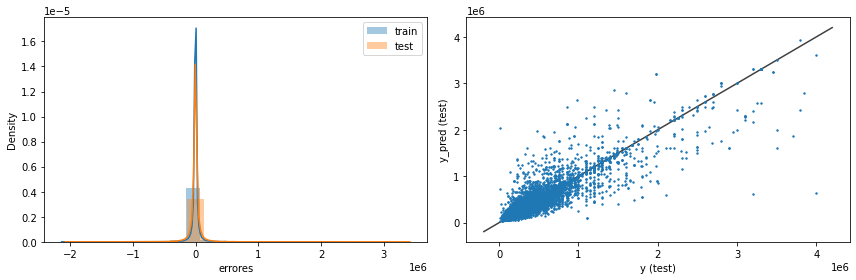

In [ ]:
print("\nK-nearest Neighbors\n")
model_ev(X_train, X_test, y_train, y_test, knr)
df3_knr = resultados(3,3,"KNR" ,"n_neighbors = 3")

#### DTR


Decision Tree Regressor

RMSE Train: 90239.04848764707

RMSE Test: 97520.4341125448

R^2(train)= 0.9028968862861536
R^2_ajt(train)= 0.9028918265923458

R^2(test)= 0.8777474523053121
R^2_ajt(test)= 0.8777410821650055



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


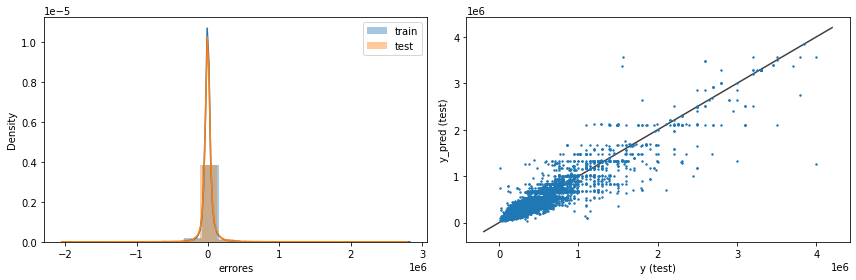

In [ ]:
print("\nDecision Tree Regressor\n")
model_ev(X_train, X_test, y_train, y_test, dtr)
df3_dtr = resultados(3,3,"DTR","max_depth = 9")

### Resultados iniciales Exp 3

In [ ]:
res_var3 = pd.concat([df3_lr, df3_knr, df3_dtr])
res_var3.reset_index(drop=True)

,Exp,Variables,Modelo,HP,rmse_train,rmse_test,R2 (train),R2 ajustado (train),R2 (test),R2 ajustado (test)
0,3,3,LR,-,261590.206248,256101.823471,0.184006,0.183963,0.156875,0.156831
1,3,3,KNR,n_neighbors = 3,81789.580086,114799.459847,0.920230,0.920226,0.830587,0.830578
2,3,3,DTR,max_depth = 9,90239.048488,97520.434113,0.902897,0.902892,0.877747,0.877741


### Ajuste de hiperparametros

* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.

#### KNR Analisis de hiperparametros

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

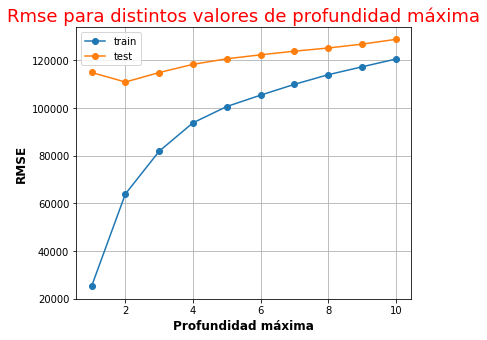

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
n_neighbors = [1,2,3,4,5,6,7,8,9,10]

for i in n_neighbors:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(n_neighbors, lista_rmse_train,'o-',label='train' )
plt.plot(n_neighbors, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

n_neighbors = 2 parece ser el valor con menor error, pero la diferencia entre los conjuntos train y test es muy grande, por lo que seguiremos usando n_neighbors = 3 pero evitar el overfitting, ya que la difrencia en el error tampoco es tan grande.

#### DTR Analsis de hiperparametros

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

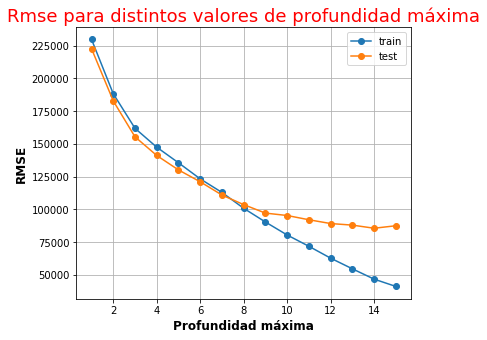

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

max_depth = 9 parece ser el mejor valor que evita el sobreajuste.

No hay cambios de hiperparametros.

### Resultados finales Exp 3

In [ ]:
res_var3 = pd.concat([df3_lr, df3_knr, df3_dtr])
res_var3.reset_index(drop=True)

,Exp,Variables,Modelo,HP,rmse_train,rmse_test,R2 (train),R2 ajustado (train),R2 (test),R2 ajustado (test)
0,3,3,LR,-,261590.206248,256101.823471,0.184006,0.183963,0.156875,0.156831
1,3,3,KNR,n_neighbors = 3,81789.580086,114799.459847,0.920230,0.920226,0.830587,0.830578
2,3,3,DTR,max_depth = 9,90239.048488,97520.434113,0.902897,0.902892,0.877747,0.877741


###Conclusion

* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?

Si bien para el modelo KNR el R^2 del conjunto train es mayor y el RMSE del conjunto train es menor, sus diferencias con el conjunto test son mucho mayores que las del modelo DTR, y se podria considerar que esta mas sobreajustado. Por otro lado esa mejoria del conjunto train es muy pequeña. Por estas razones el modelo que utilizaria para esta experimentacion seria el de DTR con max_depth=9.

Propuesta de mejora: Quizas utilizando la latitud y longitud no sea la mejor forma de parametrizar la ubicacion de las propiedades. En cambio, se podrian utlizar los barrios, o la creacion de sectores o clusters que se agrupen por los precios de las propiedades y sus ubicaciones.

## Instanciado

Probaremos el modelo con **instancias** extraidas de la pagina https://www.argenprop.com/.

1) 
Precio: UDS 160000
Sup. Cubierta: 56 m2
Lat:-34.6125257
Lon:-58.4229223
l3: Almagro

2)
Precio: USD 199900
Sup. Cubierta: 71 m2
Lat:-34.5725327
Lot:-58.4449741
l3: Belgrano

3)
Precio: USD 104900
Sup. Cubierta: 44 m2
Lat:-34.6122954 
Lon:-58.45731
l3: Caballito

4)
Precio: USD 233000
Sup. Cubierta: 86 m2
lat:-34.5828217
lon:-58.4163083
l3: Palermo


In [ ]:
df3_ml = df2_ml[["lat","lon","surface_covered","price"]]

In [ ]:
df3_ml["coord_ll"] = df3_ml.lat * df3_ml.lon
df3_ml.drop(["lat","lon"],axis=1)

,surface_covered,price,coord_ll
0,140.0,153000.0,2020.462531
1,58.0,159000.0,2022.464151
2,45.0,125000.0,2021.214853
3,50.0,295000.0,2020.818580
5,56.0,150000.0,2021.703306
...,...,...,...
146553,100.0,620000.0,2020.628596
146554,111.0,570000.0,2020.725238
146555,134.0,480000.0,2020.725238
146556,143.0,530000.0,2020.971924


In [ ]:
data_ins = { "price":[160000.0,199900.0,104900.0,233000.0],
             "surface_covered":[56.0,71.0,44.0,86.0],
             "lat":[-34.6125257,-34.5725327,-34.6122954,-34.5828217],         
             "lon":[-58.4229223,-58.4449741,-58.45731,-58.4163083]
            }
df_ins = pd.DataFrame(data_ins)
df_ins

,price,surface_covered,lat,lon
0,160000.0,56.0,-34.612526,-58.422922
1,199900.0,71.0,-34.572533,-58.444974
2,104900.0,44.0,-34.612295,-58.457310
3,233000.0,86.0,-34.582822,-58.416308


In [ ]:
df_ins["coord_ll"] = df_ins.lat * df_ins.lon
df_ins

,price,surface_covered,lat,lon,coord_ll
0,160000.0,56.0,-34.612526,-58.422922,2022.164900
1,199900.0,71.0,-34.572533,-58.444974,2020.590778
2,104900.0,44.0,-34.612295,-58.457310,2023.341682
3,233000.0,86.0,-34.582822,-58.416308,2020.200774


In [ ]:
df_ins.drop(["lat","lon"], axis=1)

,price,surface_covered,coord_ll
0,160000.0,56.0,2022.164900
1,199900.0,71.0,2020.590778
2,104900.0,44.0,2023.341682
3,233000.0,86.0,2020.200774


In [ ]:
X_train = df3_ml.drop("price",axis=1)
X_test = df_ins.drop("price",axis=1)
y_train = df3_ml.price
y_test = df_ins.price


Decision Tree Regressor

RMSE Train: 90010.89628307907

RMSE Test: 73743.4234355851

R^2(train)= 0.9012439796046794
R^2_ajt(train)= 0.9012388337838527

R^2(test)= -1.384655019124494
R^2_ajt(test)= -1.384779274915814



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


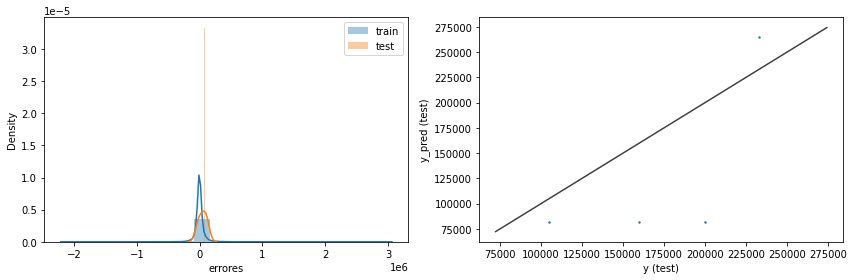

In [ ]:
dtr = DecisionTreeRegressor(max_depth=9)
# knr = KNeighborsRegressor(n_neighbors=3)
print("\nDecision Tree Regressor\n")
model_ev(X_train, X_test, y_train, y_test, dtr)

In [ ]:
y_test_pred

array([ 81500.,  81500.,  81500., 265000.])

In [ ]:
y_test

0    160000.0
1    199900.0
2    104900.0
3    233000.0
Name: price, dtype: float64

#  ADICIONAL


## 1 PREG

¿Existe un valor limite de la superficie aproximado que pueda separar al menos a las casas de los phs, y los departamentos?


In [ ]:
df_ad = df_ml.copy()
df_ad["property_type"] = raw.property_type

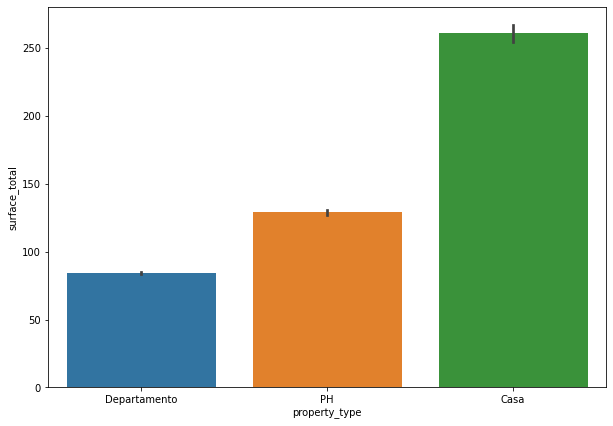

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=df_ad.property_type, y=df_ad.surface_total ,data=df_ad)

Podemos saber que, en terminos aproximados, si su superficie total es mayor a 130 m2, probablemente sea una casa, y si es menor podria ser un departamento o un PH. El problema es que tambien hay casas con menos de 130 m2 y para poder diferenciarlas tendriamos que considerar otras variables.

## 2 DTC ARG

* ¿Podemos realizar mejor esta tarea utilizando un DecisionTreeClassifier? 

[Text(697.5, 391.392, 'surface_total <= 99.5\ngini = 0.261\nsamples = 100.0%\nvalue = [0.028, 0.85, 0.122]'),
 Text(348.75, 304.416, 'surface_total <= 51.5\ngini = 0.149\nsamples = 70.1%\nvalue = [0.002, 0.919, 0.078]'),
 Text(174.375, 217.44, 'rooms <= 1.5\ngini = 0.088\nsamples = 28.8%\nvalue = [0.001, 0.954, 0.045]'),
 Text(87.1875, 130.464, 'price <= 50250.0\ngini = 0.024\nsamples = 7.1%\nvalue = [0.001, 0.988, 0.012]'),
 Text(43.59375, 43.488, 'gini = 0.18\nsamples = 0.1%\nvalue = [0.0, 0.9, 0.1]'),
 Text(130.78125, 43.488, 'gini = 0.02\nsamples = 7.0%\nvalue = [0.001, 0.99, 0.01]'),
 Text(261.5625, 130.464, 'price <= 132200.0\ngini = 0.108\nsamples = 21.7%\nvalue = [0.001, 0.943, 0.056]'),
 Text(217.96875, 43.488, 'gini = 0.131\nsamples = 15.8%\nvalue = [0.001, 0.93, 0.07]'),
 Text(305.15625, 43.488, 'gini = 0.042\nsamples = 5.9%\nvalue = [0.001, 0.978, 0.021]'),
 Text(523.125, 217.44, 'price <= 172750.0\ngini = 0.189\nsamples = 41.3%\nvalue = [0.004, 0.895, 0.102]'),
 Text(435.9

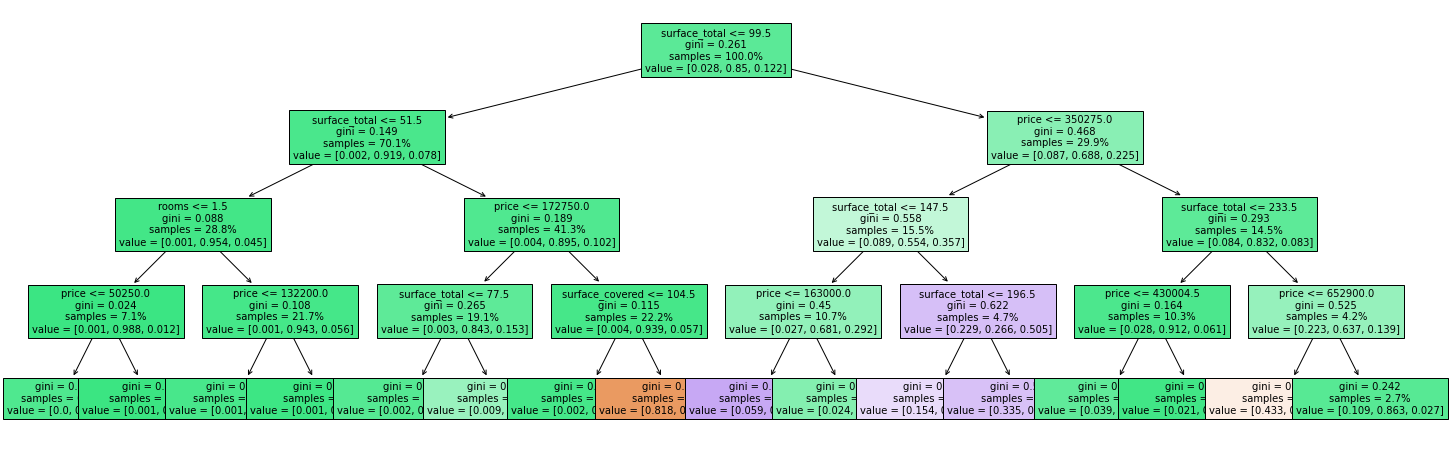

In [ ]:
# Clasificar por tipo de propiedad
# class_weight=
X = df_ad.drop(["property_type","lat","lon"],axis=1)
y = df_ad.property_type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(25,8))
tree.plot_tree(dtc,filled = True, feature_names= X.columns, proportion=True, fontsize=10)

In [ ]:
def puntajes(X_test, X_train, y_test, y_test_pred):
  print("AC SCORE TRAIN:",accuracy_score(y_train, y_train_pred))
  print("AC SCORE TEST:",accuracy_score(y_test, y_test_pred))
  print("F1 SCORE: ", (f1_score(y_test, y_test_pred, average="weighted")))
  plot_confusion_matrix(dtc, X_test, y_test, values_format=".0f") 

AC SCORE TRAIN: 0.86802880589516
AC SCORE TEST: 0.8699635290031261
F1 SCORE:  0.8484148305365815


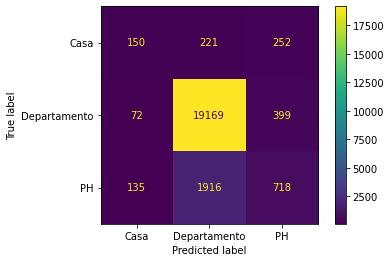

In [ ]:
puntajes(X_test, X_train, y_test, y_test_pred)

Este modelo es bueno para diferenciar solo departamentos, y puede deberse a la gran diferencia de  cantidad de muestra de cada categoria. Vamos a probar igualandolas un poco:

In [ ]:
df_ad.property_type.value_counts()

Departamento    65329
PH               9334
Casa             2108
Name: property_type, dtype: int64

In [ ]:
df_ad2 = df_ad[df_ad.property_type == "Departamento"].sample(n=2000, random_state=20)
df_ad3 = df_ad[(df_ad.property_type == "Casa")]
df_ad4 = pd.merge(df_ad2,df_ad3, how="outer")
df_ad5 = df_ad[df_ad.property_type == "PH"].sample(n=2000, random_state=20)
df_ad6 = pd.merge(df_ad4,df_ad5,how="outer")

df_ad6.property_type.value_counts()

Casa            2108
PH              2000
Departamento    2000
Name: property_type, dtype: int64

[Text(558.0, 391.392, 'surface_total <= 149.5\ngini = 0.666\nsamples = 100.0%\nvalue = [0.349, 0.321, 0.329]'),
 Text(279.0, 304.416, 'surface_total <= 83.5\ngini = 0.588\nsamples = 59.8%\nvalue = [0.108, 0.482, 0.409]'),
 Text(139.5, 217.44, 'surface_total <= 45.5\ngini = 0.484\nsamples = 33.5%\nvalue = [0.036, 0.64, 0.324]'),
 Text(69.75, 130.464, 'surface_covered <= 43.5\ngini = 0.328\nsamples = 9.9%\nvalue = [0.021, 0.8, 0.179]'),
 Text(34.875, 43.488, 'gini = 0.294\nsamples = 9.1%\nvalue = [0.02, 0.826, 0.153]'),
 Text(104.625, 43.488, 'gini = 0.528\nsamples = 0.8%\nvalue = [0.029, 0.5, 0.471]'),
 Text(209.25, 130.464, 'price <= 182500.0\ngini = 0.522\nsamples = 23.5%\nvalue = [0.042, 0.573, 0.386]'),
 Text(174.375, 43.488, 'gini = 0.538\nsamples = 16.8%\nvalue = [0.04, 0.484, 0.476]'),
 Text(244.125, 43.488, 'gini = 0.344\nsamples = 6.8%\nvalue = [0.045, 0.792, 0.163]'),
 Text(418.5, 217.44, 'price <= 289550.0\ngini = 0.612\nsamples = 26.3%\nvalue = [0.201, 0.282, 0.518]'),
 Text

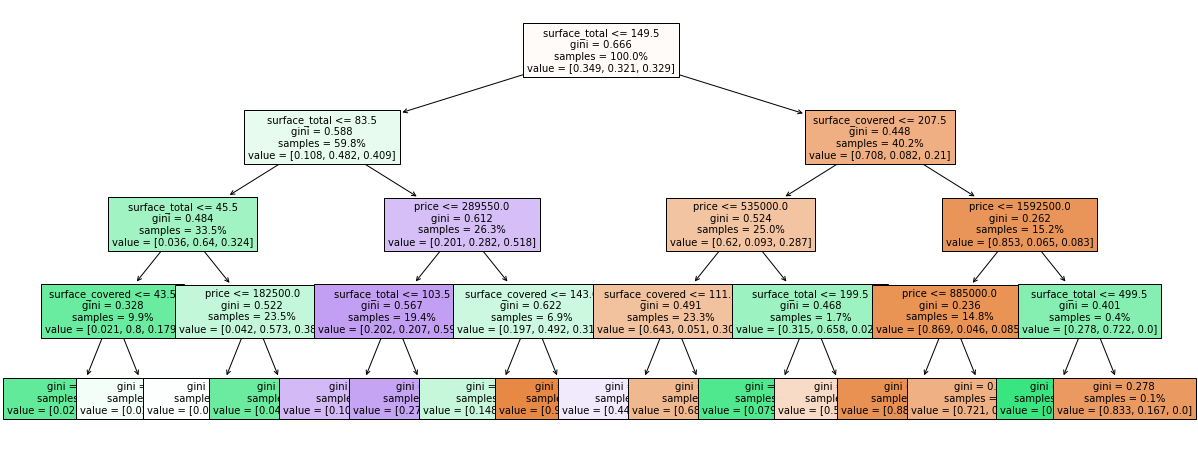

In [ ]:
# Clasificar por tipo de propiedad

X = df_ad6.drop(["property_type","lat","lon"],axis=1)
y = df_ad6.property_type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(20,8))

tree.plot_tree(dtc,filled = True, feature_names= X.columns, proportion=True, fontsize=10)

AC SCORE TRAIN: 0.664093567251462
AC SCORE TEST: 0.668303327877796
F1 SCORE:  0.6560919222396288


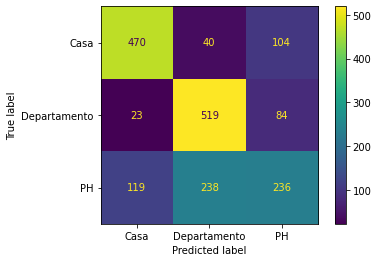

In [ ]:
puntajes(X_test, X_train, y_test, y_test_pred)

Otra forma de solventar esto es utilizar el argumento class_weight= "balanced"

[Text(558.0, 391.392, 'surface_total <= 149.5\ngini = 0.667\nsamples = 100.0%\nvalue = [0.333, 0.333, 0.333]'),
 Text(279.0, 304.416, 'surface_total <= 83.5\ngini = 0.582\nsamples = 85.7%\nvalue = [0.101, 0.491, 0.408]'),
 Text(139.5, 217.44, 'surface_covered <= 39.5\ngini = 0.487\nsamples = 61.0%\nvalue = [0.037, 0.635, 0.328]'),
 Text(69.75, 130.464, 'surface_total <= 45.5\ngini = 0.326\nsamples = 15.8%\nvalue = [0.021, 0.801, 0.178]'),
 Text(34.875, 43.488, 'gini = 0.282\nsamples = 14.5%\nvalue = [0.024, 0.835, 0.141]'),
 Text(104.625, 43.488, 'gini = 0.498\nsamples = 1.3%\nvalue = [0.0, 0.532, 0.468]'),
 Text(209.25, 130.464, 'price <= 176117.0\ngini = 0.514\nsamples = 45.2%\nvalue = [0.041, 0.59, 0.369]'),
 Text(174.375, 43.488, 'gini = 0.53\nsamples = 30.3%\nvalue = [0.036, 0.527, 0.437]'),
 Text(244.125, 43.488, 'gini = 0.384\nsamples = 14.9%\nvalue = [0.054, 0.761, 0.185]'),
 Text(418.5, 217.44, 'price <= 289700.0\ngini = 0.611\nsamples = 24.8%\nvalue = [0.189, 0.296, 0.515]'),

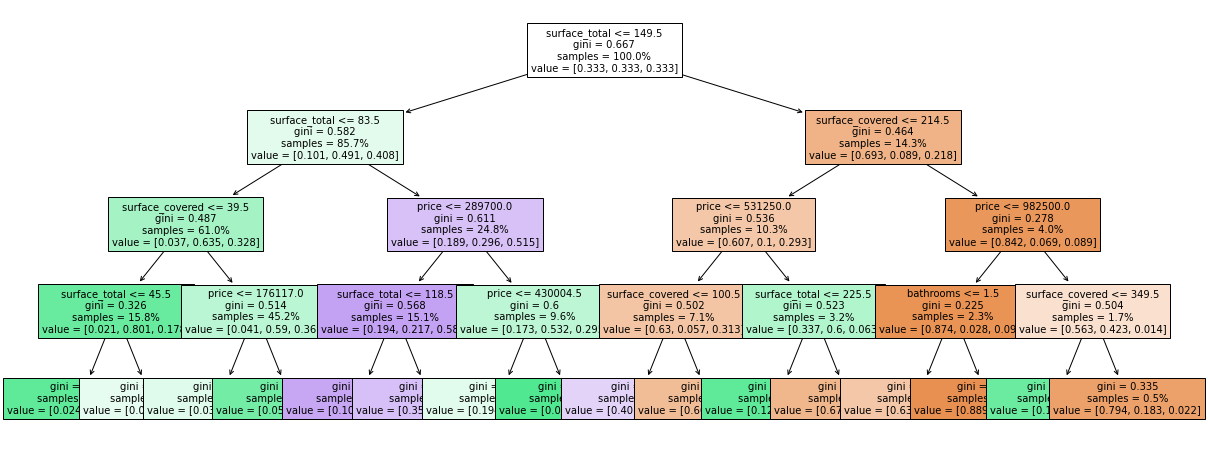

In [ ]:
#Clasificar por tipo de propiedad

X = df_ad.drop(["property_type","lat","lon"],axis=1)
y = df_ad.property_type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
dtc = DecisionTreeClassifier(max_depth=4, class_weight="balanced")
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(20,8))

tree.plot_tree(dtc,filled = True, feature_names= X.columns, proportion=True, fontsize=10)

AC SCORE TRAIN: 0.7608440797186401
AC SCORE TEST: 0.7580757207363668
F1 SCORE:  0.7874793289431887


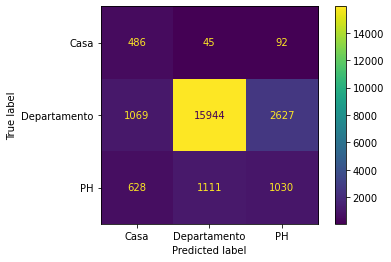

In [ ]:
puntajes(X_test, X_train, y_test, y_test_pred)

* Conclusion:
Igualando la cantidad de muestras, o agregando el argumento class_weight, vemos que el modelo ahora logra clasificar relativamente bien casas y departamentos, pero no asi los PHs. El accuracy score a bajado notablemente.

## 3 DTC URU

* ¿Podriamos aplicar el modelo anterior a un dataset de otro pais y obtener resultados similares?

In [ ]:
df_uy = pd.read_csv(r"/content/drive/MyDrive/uy_properties.csv")

In [ ]:
df_uy.head(5)
df_uy2 = df_uy[["surface_total","rooms","price","property_type"]]
df_uy3 = df_uy2.dropna()
print(df_uy3.isna().sum())
print(df_uy3.shape)

surface_total    0
rooms            0
price            0
property_type    0
dtype: int64
(924, 4)


     surface_total  rooms     price property_type
74            21.0    1.0   13500.0  Departamento
75            55.0    1.0   12000.0  Departamento
219          115.0    2.0   16500.0          Casa
235           65.0    2.0  130000.0  Departamento
236           72.0    2.0  140000.0  Departamento 

Departamento    746
Casa            171
Otro              7
Name: property_type, dtype: int64 



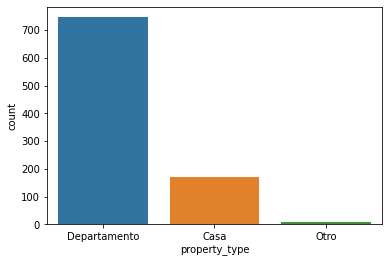

In [ ]:
print(df_uy3.head(5),"\n")
print(df_uy3.property_type.value_counts(),"\n")
sns.countplot(x=df_uy3.property_type, data=df_uy3)

* Vamos a probar un modelo que pueda diferenciar de forma binaria entre departamentos o casas, ya que solo estamos descartando 7 propiedades que son de otro tipo.

In [ ]:
df_uy4 = df_uy3[(df_uy3.property_type == "Departamento")].sample(n=171, random_state=42)
df_uy5 = df_uy3[df_uy3.property_type == "Casa"]
df_uy6 = pd.merge(df_uy4,df_uy5, how="outer")
df_uy6.property_type.value_counts()

Casa            171
Departamento    171
Name: property_type, dtype: int64

[Text(472.15384615384613, 380.52, 'surface_total <= 69.0\ngini = 0.5\nsamples = 100.0%\nvalue = [0.506, 0.494]'),
 Text(171.69230769230768, 271.8, 'surface_total <= 36.5\ngini = 0.237\nsamples = 42.7%\nvalue = [0.137, 0.863]'),
 Text(85.84615384615384, 163.07999999999998, 'gini = 0.0\nsamples = 9.2%\nvalue = [0.0, 1.0]'),
 Text(257.53846153846155, 163.07999999999998, 'price <= 20250.0\ngini = 0.289\nsamples = 33.5%\nvalue = [0.175, 0.825]'),
 Text(171.69230769230768, 54.360000000000014, 'gini = 0.408\nsamples = 17.6%\nvalue = [0.286, 0.714]'),
 Text(343.38461538461536, 54.360000000000014, 'gini = 0.1\nsamples = 15.9%\nvalue = [0.053, 0.947]'),
 Text(772.6153846153845, 271.8, 'rooms <= 1.5\ngini = 0.342\nsamples = 57.3%\nvalue = [0.781, 0.219]'),
 Text(600.9230769230769, 163.07999999999998, 'price <= 34000.0\ngini = 0.426\nsamples = 5.4%\nvalue = [0.308, 0.692]'),
 Text(515.0769230769231, 54.360000000000014, 'gini = 0.0\nsamples = 0.8%\nvalue = [1.0, 0.0]'),
 Text(686.7692307692307, 54.

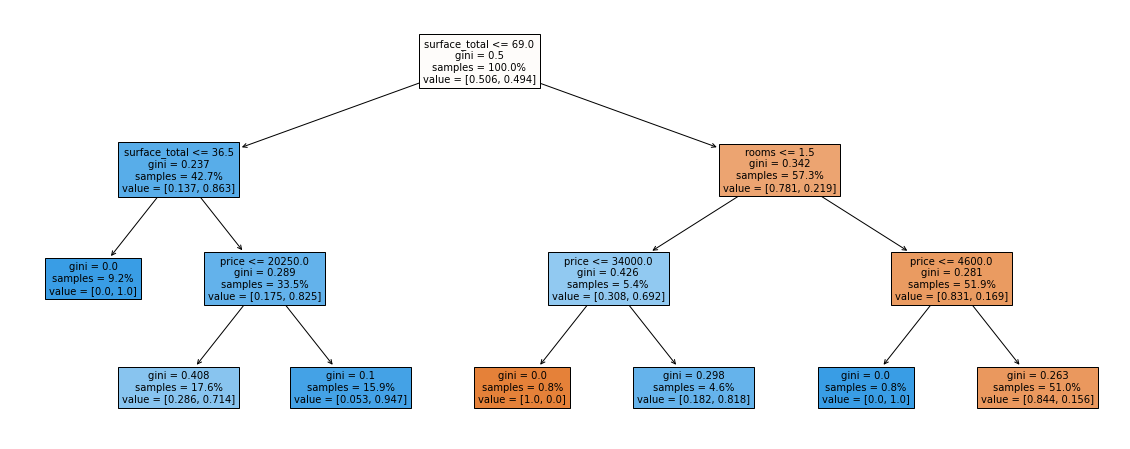

In [ ]:
# Clasificar por tipo de propiedad

X = df_uy6.drop(["property_type"],axis=1)
y = df_uy6.property_type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(20,8))
tree.plot_tree(dtc,filled = True, feature_names= X.columns, proportion=True, fontsize=10)

AC SCORE TRAIN: 0.8535564853556485
AC SCORE TEST: 0.8640776699029126
F1 SCORE:  0.8640264171389243


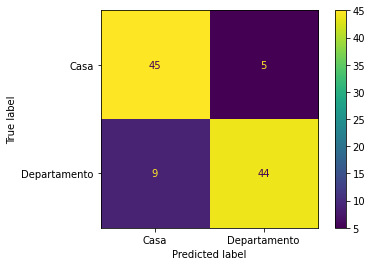

In [ ]:
puntajes(X_test, X_train, y_test, y_test_pred)

Conclusion:
Vemos que para este caso donde es una clasificacion binaria, con igual cantidad de muestra, y con menos instancias totales, obtuvimos un mucho mejor resultado en la clasificacion de cada tipo de propiedad.